# COSMEE Data Analysis
1. Import Data
    1. csv from Athena
    2. dataframe in python

2. 가공
    1. column 정리
    2. update
    3. 결합
        1. author + tag, author + activity
        2. author + user
        3. activity + user
        4. tag + 1, tag + 2
    4. 검증
        1. Data 개수
        2. 논리적 오류(ex. posting user의 demo 정보는 필수)

3. 분석
    1. 태그 선택
        1. 단어 그대로
        2. 포함

    2. output 속성, 결과값 선택
        1. survey answer
        2. output 수치
        3. 시각화

In [2]:
import os # listdir (get filelist)
import pandas as pd
import ast # to convert a string to dict

# 1. Import Data

## 1.2. 모든 데이터 dataframe으로 저장

In [3]:
# file list
dir_data = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/Pilot/'
dir_output = 'C:/Users/dongm/COSMOCHAIN/Code/'
filelist =os.listdir(dir_data)
display(filelist)

['comments.csv',
 'comments_update.csv',
 'downvote.csv',
 'posts.csv',
 'posts_tags.csv',
 'recomments.csv',
 'recomments_update.csv',
 'sort.csv',
 'user.csv',
 'users_update.csv',
 'vote.csv']

In [4]:
# csv to dataframe
def csv2df(mydir,inp):
    print(inp,'reading')
    try:
        data = pd.read_csv(mydir+inp, encoding='UTF-8')
    except:
        data = pd.read_csv(mydir+inp, encoding='cp949')
    return data


In [5]:
# dataframe 저장
def saveAllFile(filelist):
    data={}
    for i in range(len(filelist)):
        inputfilename= filelist[i]
        if inputfilename[-3:] != 'csv':
            continue
        df = csv2df(dir_data,inputfilename)
        data[inputfilename]=df
        
    return data

In [6]:
# 파일 dataframe에 저장    
dic_data = saveAllFile(filelist)

comments.csv reading
comments_update.csv reading
downvote.csv reading
posts.csv reading
posts_tags.csv reading
recomments.csv reading
recomments_update.csv reading
sort.csv reading
user.csv reading
users_update.csv reading
vote.csv reading


# 2. 가공

## 2.1. column 정리

### Survey Answer : Pivot Table (by question id, answer)

In [7]:
# survey answer 파일 경로
dir_survey = 'C:/Users/dongm/COSMOCHAIN/Data/COSMEE/정리/'
inp = 'survey.xlsx'


In [8]:
survey_answers = pd.read_excel(dir_survey + inp,sheet_name=3)
print('설문조사에 참여한 사람 :',len(set(survey_answers['userid'])),'명')

survey_answers = survey_answers.sort_values(by=['userid','questionid'])
# survey_answers = survey_answers.reset_index(drop=True)
survey_answers = survey_answers.pivot('userid','questionid','answer')


설문조사에 참여한 사람 : 2192 명


### tag sorting

In [9]:
sortoftag = dic_data['sort.csv']
sortoftag.head()

태그    횟수     분류
0   코스미  7874     기타
1    보습  3453     기능
2    향수  2803  카테고리별
3  메이크업  2241   메이크업
4   립스틱  2104  카테고리별

### User : basicskininfo 쪼개고, age는 현재 기준

In [10]:
def setUser(user):
    age = []
    gender   = []
    skinTone = []
    skinType = []
    skinConcern1 = []
    skinConcern2 = []
    skinConcern3 = []

    for i in range(len(user)):
        # 나이, 성별

        try:
            userAge = 2020 - int(ast.literal_eval(user['profileproperties'][i])['birthday'][:4])
            userGender = ast.literal_eval(user['profileproperties'][i])['gender']
        except:
            userAge = 0
            userGender = '#'

        # skinTone, skinType, skinConcerns
        try:
            userSkinTone = ast.literal_eval(user['basicskininfo'][i])['skinTone']
            userSkinType = ast.literal_eval(user['basicskininfo'][i])['skinType']
            userSkinConcerns = ast.literal_eval(user['basicskininfo'][i])['skinConcerns']
        except:
            userSkinTone = '#'
            userSkinType = '#'
            userSkinConcerns = ['#','#','#']


        while len(userSkinConcerns) < 3:
            userSkinConcerns.append('#')

        age.append(userAge)
        gender.append(userGender)
        skinTone.append(userSkinTone)
        skinType.append(userSkinType)
        skinConcern1.append(userSkinConcerns[0])
        skinConcern2.append(userSkinConcerns[1])
        skinConcern3.append(userSkinConcerns[2])
        
    # column 추가
    user['age']         = age
    user['gender']      = gender
    user['skinTone']    = skinTone
    user['skinType']    = skinType
    user['skinConcern1']= skinConcern1
    user['skinConcern2']= skinConcern2
    user['skinConcern3']= skinConcern3
    user = user.drop(columns=['basicskininfo','profileproperties'])
    
    return user

### user : 최초 가입 시

In [11]:
user = dic_data['user.csv']
user = setUser(user)

user = user.sort_values(by='userid', ascending=False)

user = user.reset_index(drop=True)

# user = user.set_index('userid')

### users_update : 가입후 정보변경

In [12]:
users_update = dic_data['users_update.csv']
users_update = setUser(users_update)

users_update = users_update.sort_values(by=['userid','age','skinConcern1'], ascending=False)

users_update = users_update.drop_duplicates(subset='userid')

users_update = users_update.reset_index(drop=True)

## 2.2. update data

In [13]:
'''
def applyUpdate(df1, df2):
    cnt=0
    print('전체 데이터 개수 :',len(df1))
    for i in range(len(df1)):
        if df1['userid'][i]==df2['userid'][cnt]:
            df1.iloc[i]=df2.iloc[cnt]
            cnt+=1
            
        if i%1000 == 0:
            print('df1 row =', i,'df2 row =',cnt)
    return df1

user = applyUpdate(user, users_update)
user.head()
'''

print('시간이 너무 오래걸려서 고민 필요!')


시간이 너무 오래걸려서 고민 필요!


In [14]:
# user.to_csv(dir_output+'users_final.csv')
user_total = pd.read_csv(dir_output+'users_final.csv', encoding='UTF-8')
user_total['skinConcerns'] = '"'+user_total['skinConcern1'] +'","'+ user_total['skinConcern2'] + '","' +user_total['skinConcern3']+'"'
user_total = user_total.drop(columns=['Unnamed: 0','skinConcern1','skinConcern2','skinConcern3'])

user_total.head()

userid  age  gender skinTone     skinType  \
0  ffffe04b-cc6d-42ed-bdff-d34c1f681145   28  FEMALE   MIDDLE  COMBINATION   
1  fffc943d-2465-448e-8d4b-b6ad5ae94891   35  FEMALE   BRIGHT  COMBINATION   
2  fff85d68-d364-4f0e-a541-6a26c9486b32    0       #        #            #   
3  fff720a5-ae75-4095-9a41-1a775187cc0d    0       #        #            #   
4  fff67ffa-4926-4859-b879-fd7f4166b396   31  FEMALE   MIDDLE          DRY   

                        skinConcerns  
0      "WHITENING","BLACKHEAD","DRY"  
1                      "DRY","#","#"  
2                        "#","#","#"  
3                        "#","#","#"  
4  "BLACKHEAD","WHITENING","WRINKLE"

## 2.3 결합

### 2.3.1 tag + posts, comments, recomments, votes, downvotes

In [15]:
def tags_activity(activity):
    caller = dic_data[activity]
    other  = dic_data['posts_tags.csv']
    try:
        tags_activity = caller.set_index('postid').join(other.set_index('postid'))
    except:
        tags_activity = caller.set_index('targetid').join(other.set_index('postid'))
        tags_activity.index.name = 'postid'

    tags_activity = tags_activity.reset_index()
    tags_activity = tags_activity.drop_duplicates()
    tags_activity = tags_activity.dropna(subset=['name'])
    
    print(activity,'join complete!')
    return tags_activity

In [16]:
'''
tags_recomments = tags_activity('recomments.csv')
tags_comments = tags_activity('comments.csv')
tags_downvote = tags_activity('downvote.csv')
tags_vote = tags_activity('vote.csv')
'''
tags_posts = tags_activity('posts.csv')

posts.csv join complete!


In [17]:
len(tags_posts)

250423

In [18]:
caller  = tags_posts
other = user_total

user_posts = caller.set_index('authorid').join(other.set_index('userid'))
user_posts.head()

postid  \
00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   
00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   
00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   
00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   
00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   

                                     name  age gender skinTone skinType  \
00073951-eb12-4a0f-94a4-b432fe3c821d  립스틱    0      #        #        #   
00073951-eb12-4a0f-94a4-b432fe3c821d  좋아요    0      #        #        #   
00073951-eb12-4a0f-94a4-b432fe3c821d   맞추    0      #        #        #   
00073951-eb12-4a0f-94a4-b432fe3c821d   맞팔    0      #        #        #   
00073951-eb12-4a0f-94a4-b432fe3c821d  갑니당    0      #        #        #   

                                     skinConcerns  
00073951-eb12-4a0f-94a4-b432fe3c821d  "#","#","#"  
00073951-eb12-4a0f-94a4-b432fe3c821d  "#","#","#"  
00073951-eb12-4a0f-94a4-b432fe3c821d  "#","#","#"  
00073951-eb12-4a0f-94a4-b432fe3c821d  "#","#","#"  
00073951-eb12-4a0f-94a4-b432fe3c821d  "#","#","#"

In [19]:
user_posts.index.name = 'userid'
user_posts = user_posts.reset_index()
print('전체 tag 개수 :',len(user_posts))

전체 tag 개수 : 250423


In [20]:
postUserSurvey = user_posts.join(survey_answers,on='userid')
postUserSurvey = postUserSurvey.sort_values(by='userid')
postUserSurvey = postUserSurvey.reset_index(drop=True)
# del dic_data

In [21]:
postUserSurvey.head(2)

userid                                postid  \
0  00073951-eb12-4a0f-94a4-b432fe3c821d  439a0baa-b7cb-439a-8de6-98ce2dc51d34   
1  00073951-eb12-4a0f-94a4-b432fe3c821d  a29e4169-8e35-4c71-8511-33143fdec999   

      name  age gender skinTone skinType skinConcerns   1-1-0           1-2-0  \
0      립스틱    0      #        #        #  "#","#","#"  ["여자"]  ["1993.10.19"]   
1  에뛰드하우스     0      #        #        #  "#","#","#"  ["여자"]  ["1993.10.19"]   

          ...               5-3-D 5-3-E 5-3-F 5-3-G                7-1-0  \
0         ...          ["사용자 리뷰"]   NaN   NaN   NaN  ["효과","성분","제품 후기"]   
1         ...          ["사용자 리뷰"]   NaN   NaN   NaN  ["효과","성분","제품 후기"]   

                 7-2-0               7-3-0                 8-1-0  \
0  ["크리니크","헤라","라네즈"]  ["30,000~50,000원"]  ["발색","지속력","제품 후기"]   
1  ["크리니크","헤라","라네즈"]  ["30,000~50,000원"]  ["발색","지속력","제품 후기"]   

                     8-2-0               8-3-0  
0  ["베네피트","메이크업포레버","샤넬"]  ["50,000~80,000원"]  
1  ["베네피트","메이크업포레버","샤넬"]  ["50,000~80,000원"]  

[2 rows x 72 columns]

# 3.분석

In [22]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 3.1. 태그 선택

In [43]:
def getTagSummary(postUserSurvey, brand=False):
    if brand:
        TF=[]
        for i in range(len(postUserSurvey)):
            my_tag = postUserSurvey['name'][i]
            if my_tag[:len(brand)]==brand:
                TF.append(True)
            else:
                TF.append(False)
        postUserSurvey=postUserSurvey.iloc[TF,:]
    
    
#    postUserSurvey = postUserSurvey.drop(columns='skinConcerns')
    
    # 해당 브랜드 관련 posting 한 user의 중복 제거!!
    postUserSurvey = postUserSurvey.drop_duplicates(subset='userid')
    postUserSurvey = postUserSurvey.drop(columns=['userid','postid','name'])
    # 여기서 원하는 속성 선택하는거야!
    # 어떤 속성??
    #
    mybrand = postUserSurvey.apply(pd.value_counts)
    return mybrand

In [24]:
def dequote(string):
    if len(string)<=1:
        return string
    if string[0] in ['"',"'"]:
        string = string[1:]
    if string[-1] in ['"',"'"]:
        string = string[:-1]
    return string

In [25]:
def skingender_result(mydata, col):
    result_dic = {}
    labels = mydata.index
    sizes = mydata
    for i, label in enumerate(labels):
        result_dic[label] = sizes[i]
        
    return result_dic


In [26]:
def survey_result(mydata, col):
    labels=[]
    for n, index in enumerate(mydata.index):
        index = index[1:-1]
        index = index.split('","') * int( mydata[n] )
        for item in index:
            item = dequote(item)
            labels.append(item)
    counter = Counter(labels)
    return dict(counter.most_common())


In [27]:
def age_result(mydata, col):
    result_dic = {}
    bins = range(max(mydata.index)+1)
    cnt=0
    for b in bins:
        if mydata.index[cnt]==b:
            result_dic[b]=mydata.iloc[cnt]
            cnt+=1
        else:
            result_dic[b]=0
        
    return result_dic


In [28]:
import csv

def result_brand(brand, brandname, topN = 10):
    for col in brand.columns:
        mydata = brand[col]
        mydata = mydata.dropna()
        mydata = mydata.sort_index()

        # 성별
        if col=='age':
            result = age_result(mydata, col)
            
            fig, ax1 = plt.subplots()
            ax1.bar(result.keys(), result.values())

        # skinTone, Type, Gender
        elif col in ['skinTone','skinType','gender']:
            result = skingender_result(mydata, col)
            
            fig, ax1 = plt.subplots()
            ax1.pie(result.values(), labels=result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            
        # skinConcerns
        elif col =='skinConcerns':
            result = survey_result(mydata, col)
            del result['#']
            fig, ax1 = plt.subplots()
            
            ax1.pie(result.values(), labels = result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90, labeldistance=1.05)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            
        
        # survey
        else:
            result = survey_result(mydata, col)
            larger = {}
            smaller= {'기타':0}
            for key,value in result.items():
                if value < sum(result.values()) * max(0.02, 1/int(sum(mydata))):
                    smaller['기타'] += value
                else:
                    larger[key] = value
            result=larger
            if smaller['기타']>0:
                result.update(smaller)
            
            fig, ax1 = plt.subplots()
            
            ax1.pie(result.values(), labels = result.keys(), autopct='%1.1f%%',
                    shadow=True, startangle=90, labeldistance=1.05)
            ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                    
                
                
        plt.title(brandname+' '+col)
        
        print('-*'*15)
        print('ASK :', col)
        print('유저 수 :', int(sum(mydata)))
        print('답변 수(중복포함) :',int(sum(result.values())))
        print('Top %d' % min(5, len(result)))
        display(Counter(result).most_common(5))
        
            
        while False:
            plt.savefig(dir_output+brandname+col+'.png')
            with open(brandname+'.csv', 'a') as f:  # Just use 'w' mode in 3.x
                w = csv.writer(f)
                w.writerow(result.keys())
                w.writerow(result.values())
        plt.show()

In [37]:
total_tag = getTagSummary(postUserSurvey)

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


### 전체 태그

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : age
유저 수 : 4967
답변 수(중복포함) : 4967
Top 5


[(30, 485.0), (16, 317.0), (17, 284.0), (15, 280.0), (0, 194.0)]

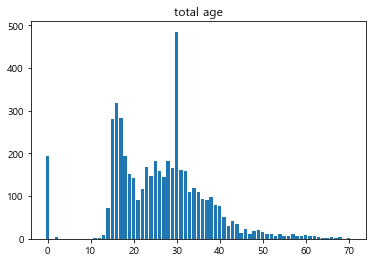

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : gender
유저 수 : 4967
답변 수(중복포함) : 4967
Top 3


[('FEMALE', 3565.0), ('MALE', 1208.0), ('#', 194.0)]

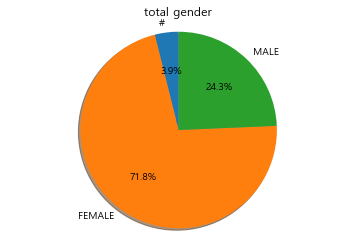

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinTone
유저 수 : 4967
답변 수(중복포함) : 4967
Top 4


[('MIDDLE', 2676.0), ('BRIGHT', 1415.0), ('DARK', 684.0), ('#', 192.0)]

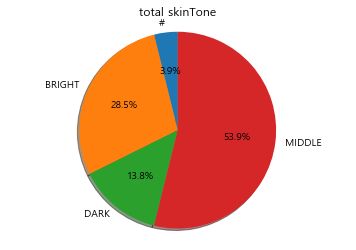

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinType
유저 수 : 4967
답변 수(중복포함) : 4967
Top 5


[('COMBINATION', 1787.0),
 ('DRY', 1336.0),
 ('OILY', 874.0),
 ('NORMAL', 778.0),
 ('#', 192.0)]

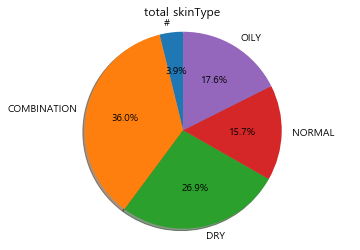

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinConcerns
유저 수 : 4967
답변 수(중복포함) : 11695
Top 5


[('BLACKHEAD', 2674),
 ('DRY', 2202),
 ('ACNE', 2004),
 ('WHITENING', 1742),
 ('SENSITIVE', 1657)]

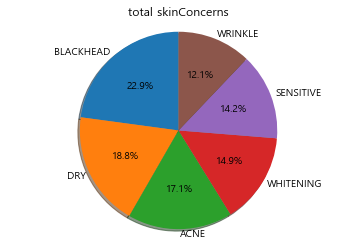

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-1-0
유저 수 : 1389
답변 수(중복포함) : 1389
Top 2


[('여자', 834), ('남자', 555)]

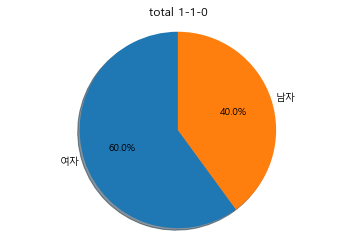

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-2-0
유저 수 : 1389
답변 수(중복포함) : 1389
Top 1


[('기타', 1389)]

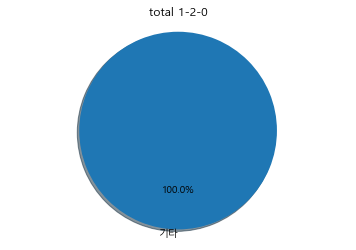

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-3-0
유저 수 : 1389
답변 수(중복포함) : 2778
Top 5


[('기타', 1534), ('서울특별시', 399), ('경기도', 284), ('부산광역시', 108), ('경상남도', 96)]

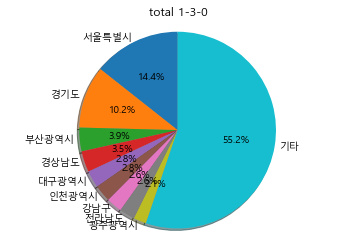

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-1-0
유저 수 : 649
답변 수(중복포함) : 649
Top 3


[('둘 다 이용함', 288), ('온라인', 216), ('오프라인', 145)]

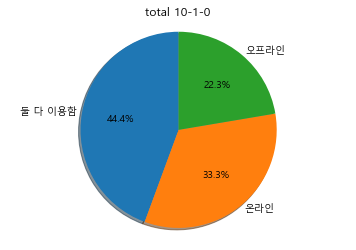

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-A
유저 수 : 216
답변 수(중복포함) : 216
Top 5


[('기타', 109), ('올리브영', 19), ('11번가', 18), ('옥션', 11), ('쿠팡', 10)]

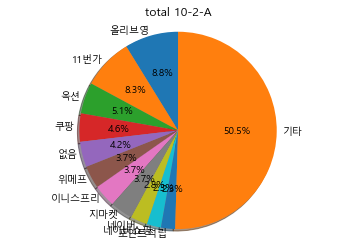

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-B
유저 수 : 145
답변 수(중복포함) : 145
Top 5


[('올리브영', 56), ('기타', 48), ('이니스프리', 15), ('아리따움', 12), ('백화점', 7)]

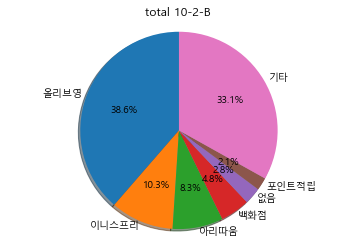

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-C
유저 수 : 288
답변 수(중복포함) : 288
Top 2


[('온라인', 145), ('오프라인', 143)]

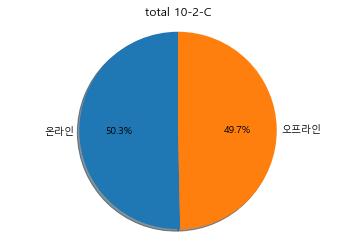

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-A
유저 수 : 216
답변 수(중복포함) : 216
Top 4


[('가격이 더 싸서', 143), ('매장에 가기 귀찮아서', 57), ('온라인에서만 파는 제품이라서', 11), ('기타', 5)]

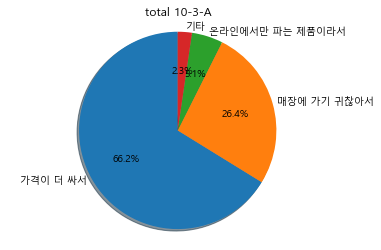

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-B
유저 수 : 145
답변 수(중복포함) : 145
Top 4


[('직접 제품을 체험해 보기 위해', 104), ('기다리기 싫어서', 28), ('온라인은 가품일 수 있어서', 9), ('기타', 4)]

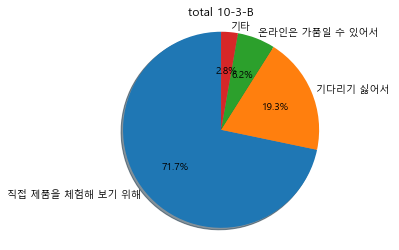

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-C
유저 수 : 288
답변 수(중복포함) : 288
Top 5


[('기타', 171), ('올리브영', 68), ('이니스프리', 17), ('토니모리', 10), ('11번가', 9)]

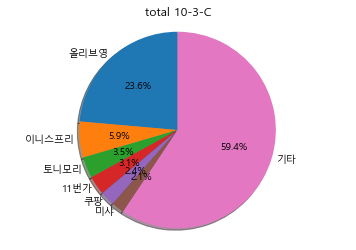

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-1-0
유저 수 : 601
답변 수(중복포함) : 601
Top 3


[('둘 다 이용함', 247), ('오프라인', 183), ('온라인', 171)]

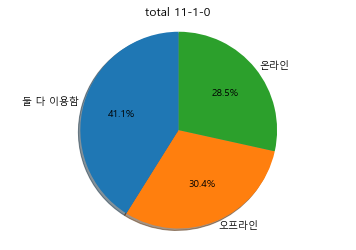

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-A
유저 수 : 171
답변 수(중복포함) : 171
Top 5


[('기타', 82), ('11번가', 20), ('올리브영', 18), ('옥션', 10), ('없음', 8)]

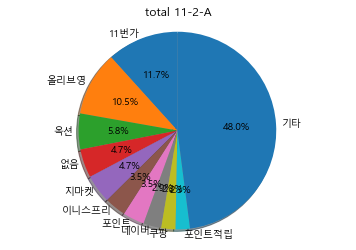

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-B
유저 수 : 183
답변 수(중복포함) : 183
Top 5


[('기타', 65), ('올리브영', 57), ('이니스프리', 16), ('아리따움', 15), ('더페이스샵', 8)]

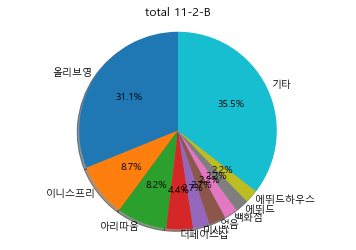

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-C
유저 수 : 247
답변 수(중복포함) : 247
Top 2


[('오프라인', 154), ('온라인', 93)]

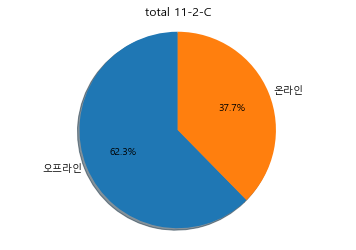

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-A
유저 수 : 171
답변 수(중복포함) : 171
Top 5


[('가격이 더 싸서', 123),
 ('매장에 가기 귀찮아서', 34),
 ('매장에는 재고가 없기 때문에', 5),
 ('온라인에서만 파는 제품이라서', 5),
 ('기타', 4)]

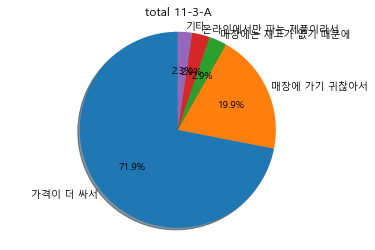

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-B
유저 수 : 183
답변 수(중복포함) : 183
Top 4


[('직접 제품을 체험해 보기 위해', 157), ('기다리기 싫어서', 15), ('온라인은 가품일 수 있어서', 6), ('기타', 5)]

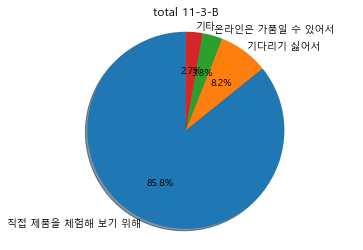

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-C
유저 수 : 247
답변 수(중복포함) : 247
Top 5


[('기타', 143), ('올리브영', 58), ('아리따움', 11), ('미샤', 9), ('에뛰드하우스', 8)]

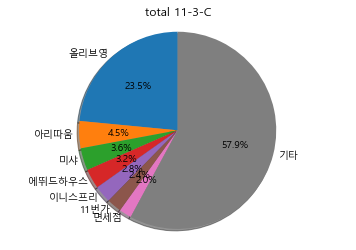

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-1-0
유저 수 : 1112
답변 수(중복포함) : 1112
Top 5


[('복합성', 371), ('건성', 350), ('지성', 234), ('중성', 114), ('잘 모르겠음', 43)]

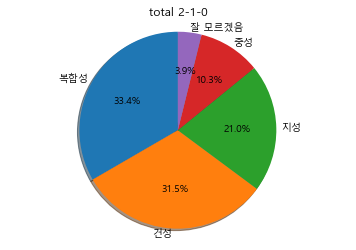

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-2-0
유저 수 : 1112
답변 수(중복포함) : 1112
Top 4


[('중간 톤', 588), ('밝은 톤', 328), ('어두운 톤', 181), ('기타', 15)]

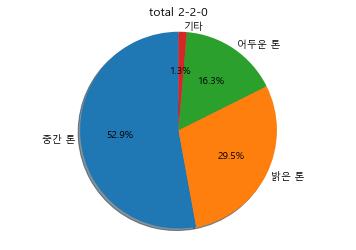

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-3-0
유저 수 : 1112
답변 수(중복포함) : 2513
Top 5


[('건조', 506), ('주름/탄력', 489), ('블랙헤드/피지', 477), ('여드름', 353), ('미백', 345)]

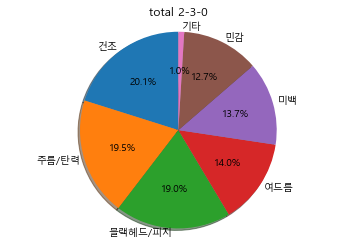

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-1-0
유저 수 : 1027
답변 수(중복포함) : 2222
Top 5


[('SNS (인스타그램/블로그 등)', 661),
 ('TV', 465),
 ('비디오 플랫폼 (유튜브 등)', 420),
 ('온라인 쇼핑', 323),
 ('커뮤니티', 297)]

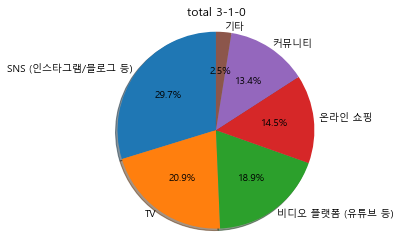

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-A
유저 수 : 322
답변 수(중복포함) : 322
Top 5


[('TVN', 92), ('JTBC', 84), ('MBC', 54), ('SBS', 49), ('KBS', 27)]

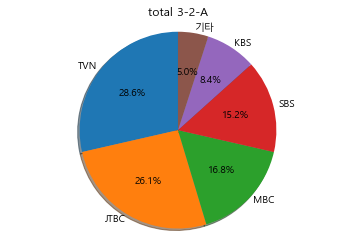

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-B
유저 수 : 412
답변 수(중복포함) : 769
Top 5


[('인스타그램', 313), ('페이스북', 220), ('블로그', 174), ('트위터', 47), ('기타', 15)]

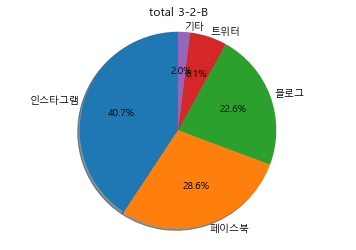

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-C
유저 수 : 134
답변 수(중복포함) : 213
Top 5


[('유튜브', 126), ('네이버 TV', 39), ('아프리카', 24), ('카카오 TV', 19), ('기타', 5)]

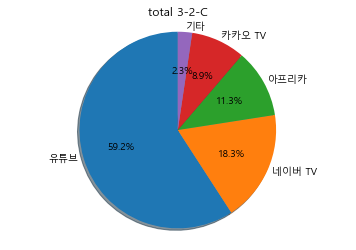

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-D
유저 수 : 73
답변 수(중복포함) : 128
Top 5


[('네이트 판', 31), ('파우더룸', 22), ('여성시대', 18), ('기타', 17), ('쭉방카페', 9)]

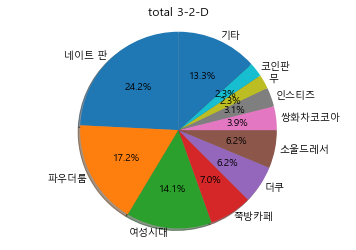

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-E
유저 수 : 71
답변 수(중복포함) : 150
Top 5


[('오픈마켓(G마켓, 11번가, 쿠팡 )', 50),
 ('네이버 쇼핑', 46),
 ('종합 쇼핑몰(신세계몰, CJmall 등)', 27),
 ('브랜드 공식 홈페이지', 14),
 ('드럭스토어(올리브영 등)', 13)]

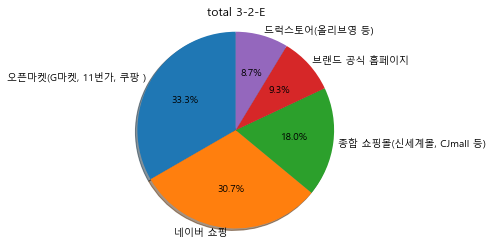

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-F
유저 수 : 15
답변 수(중복포함) : 15
Top 5


[('Sns', 1),
 ('가상화페 투자', 1),
 ('독서 하면서 보내요 여행도 하고 외국어 공부를 취미 생활로 하면서 일상을 보냅니다~^^', 1),
 ('라디오 들으면서 일상 생활하기', 1),
 ('명상', 1)]

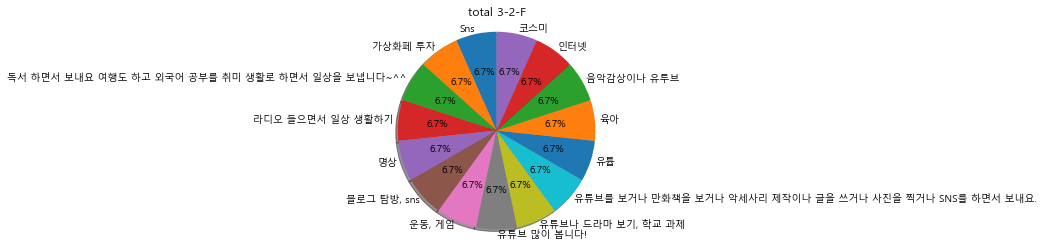

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-3-0
유저 수 : 1027
답변 수(중복포함) : 1027
Top 5


[('SNS', 331), ('화장품 리뷰 앱', 200), ('포털사이트', 145), ('커뮤니티', 106), ('지인', 92)]

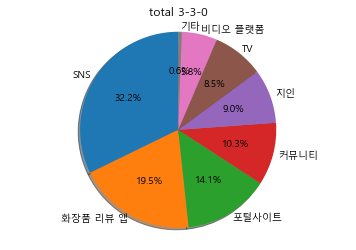

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-1-0
유저 수 : 943
답변 수(중복포함) : 943
Top 5


[('포털사이트', 279),
 ('SNS', 211),
 ('화장품 리뷰 앱', 191),
 ('쇼핑몰 후기', 119),
 ('커뮤니티', 72)]

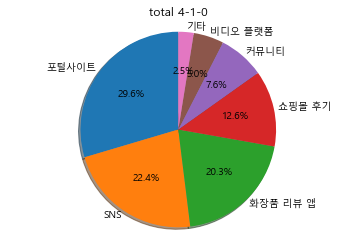

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-A
유저 수 : 279
답변 수(중복포함) : 279
Top 4


[('네이버', 243), ('다음', 21), ('구글', 9), ('기타', 6)]

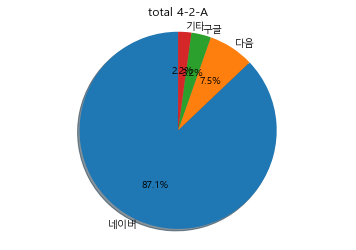

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-B
유저 수 : 47
답변 수(중복포함) : 47
Top 4


[('유튜브', 34), ('카카오 TV', 8), ('네이버 TV', 4), ('티비', 1)]

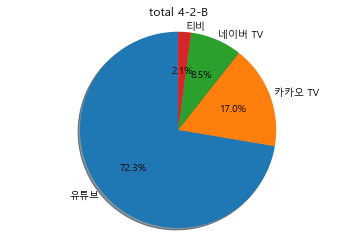

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-C
유저 수 : 211
답변 수(중복포함) : 211
Top 5


[('인스타그램', 84), ('블로그', 60), ('페이스북', 45), ('트위터', 15), ('기타', 7)]

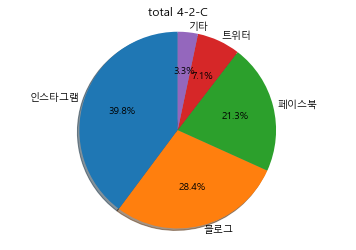

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-D
유저 수 : 191
답변 수(중복포함) : 191
Top 5


[('화해', 116), ('글로우픽', 26), ('파우더룸', 25), ('언니의파우치', 17), ('코스미', 5)]

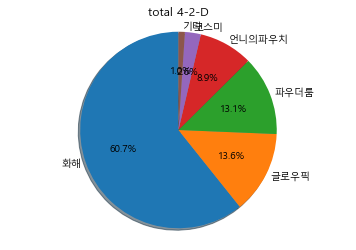

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-E
유저 수 : 72
답변 수(중복포함) : 72
Top 5


[('파우더룸', 17), ('네이트 판', 16), ('여성시대', 13), ('기타', 7), ('인스티즈', 5)]

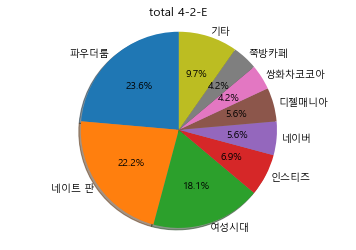

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-F
유저 수 : 119
답변 수(중복포함) : 119
Top 5


[('오픈마켓(G마켓, 11번가, 쿠팡)', 44),
 ('네이버 쇼핑', 39),
 ('브랜드 공식 홈페이지', 20),
 ('종합 쇼핑몰(신세계몰,CJmall 등)', 10),
 ('드럭스토어(올리브영 등)', 4)]

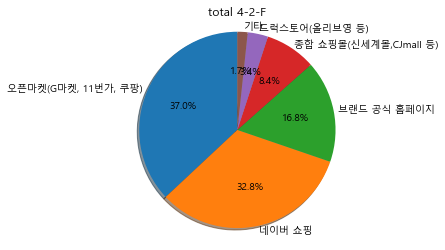

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-G
유저 수 : 24
답변 수(중복포함) : 24
Top 5


[('네이버', 3), ('유투브', 2), ('Sns', 1), ('sbs', 1), ('따로 없어요', 1)]

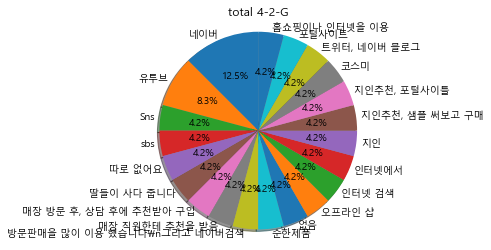

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-A
유저 수 : 279
답변 수(중복포함) : 279
Top 5


[('블로그/카페 후기', 199), ('공식 홈페이지', 45), ('쇼핑몰', 14), ('기사', 13), ('이미지', 8)]

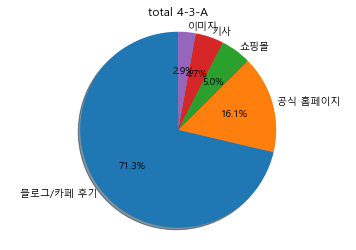

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-B
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('조회수가 많은 콘텐츠', 16),
 ('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 13),
 ('아는 유튜버의 콘텐츠', 12),
 ('상단에 뜨는 콘텐츠', 4),
 ('이미지가 마음에 드는 콘텐츠', 2)]

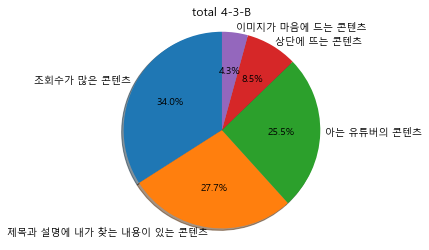

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-C
유저 수 : 211
답변 수(중복포함) : 211
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 101),
 ('상단에 뜨는 콘텐츠', 50),
 ('이미지가 마음에 드는 콘텐츠', 44),
 ('영상 콘텐츠', 16)]

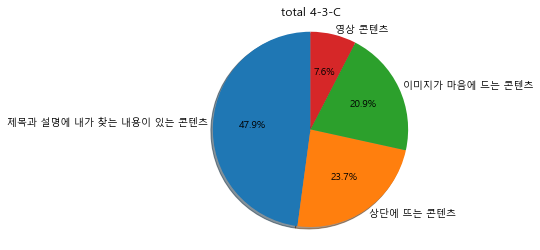

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-D
유저 수 : 191
답변 수(중복포함) : 191
Top 5


[('사용자 리뷰', 103), ('성분', 29), ('평점', 24), ('랭킹', 21), ('제품 정보', 14)]

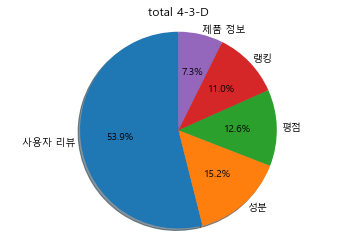

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-E
유저 수 : 72
답변 수(중복포함) : 72
Top 3


[('사용자 리뷰', 58), ('제품 정보', 12), ('기타', 2)]

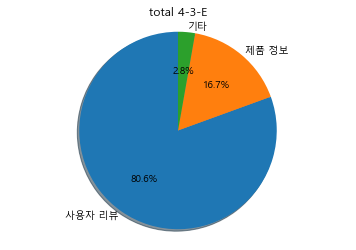

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-F
유저 수 : 119
답변 수(중복포함) : 119
Top 2


[('사용자 리뷰', 90), ('제품 정보', 29)]

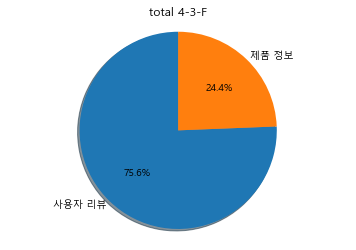

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-G
유저 수 : 24
답변 수(중복포함) : 24
Top 5


[('11번가', 1),
 ('happy', 1),
 ('가장 신뢰할만함. 포털타이트나 인터넷카페,인스타 등은 돈받고 허위로 쓰는 사람이 많음', 1),
 ('검색은 네이버가 상세한것 같아서요\\n저는 무조건 네이버입니다', 1),
 ('국민의 방송', 1)]

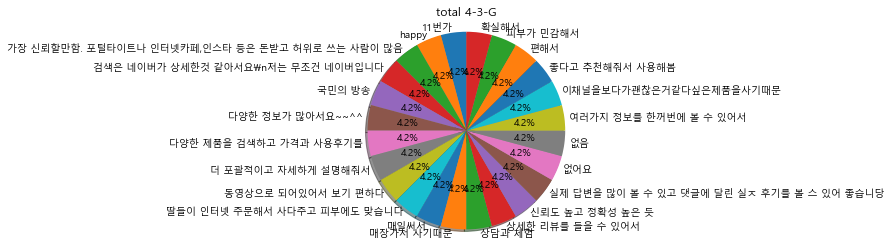

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-1-0
유저 수 : 897
답변 수(중복포함) : 897
Top 5


[('포털사이트', 259),
 ('SNS', 243),
 ('화장품 리뷰 앱', 147),
 ('쇼핑몰 후기', 94),
 ('비디오 플랫폼', 69)]

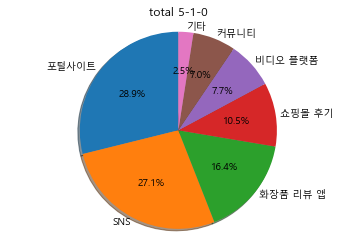

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-A
유저 수 : 259
답변 수(중복포함) : 259
Top 4


[('네이버', 228), ('다음', 18), ('구글', 8), ('기타', 5)]

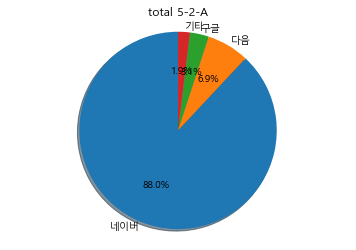

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-B
유저 수 : 69
답변 수(중복포함) : 69
Top 3


[('유튜브', 55), ('네이버 TV', 12), ('카카오 TV', 2)]

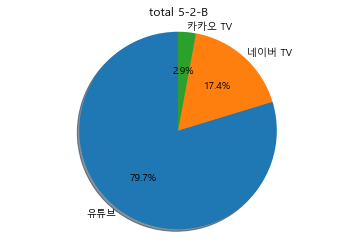

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-C
유저 수 : 243
답변 수(중복포함) : 243
Top 5


[('인스타그램', 123), ('블로그', 65), ('페이스북', 47), ('트위터', 5), ('기타', 3)]

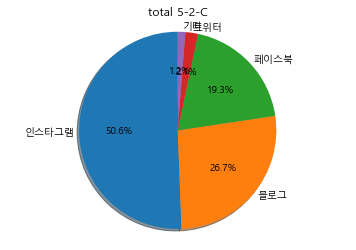

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-D
유저 수 : 147
답변 수(중복포함) : 147
Top 5


[('화해', 75), ('파우더룸', 33), ('글로우픽', 18), ('언니의파우치', 14), ('코스미', 4)]

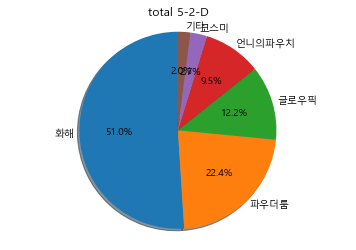

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-E
유저 수 : 63
답변 수(중복포함) : 63
Top 5


[('파우더룸', 13), ('네이트 판', 10), ('여성시대', 10), ('인스티즈', 8), ('기타', 6)]

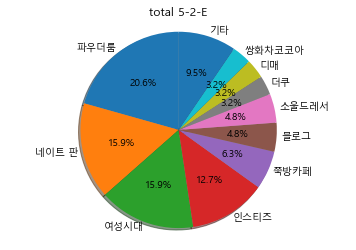

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-F
유저 수 : 94
답변 수(중복포함) : 94
Top 5


[('네이버 쇼핑', 31),
 ('오픈마켓(G마켓', 15),
 ('브랜드 공식 홈페이지', 12),
 ('11번가', 11),
 ('종합 쇼핑몰(신세계몰', 11)]

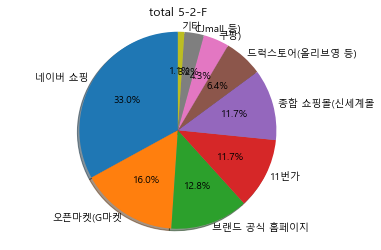

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-G
유저 수 : 22
답변 수(중복포함) : 22
Top 5


[('유투브', 2),
 ('Sns', 1),
 ('kbs', 1),
 ('남자라 잘;;;', 1),
 ('네이버 블로그, 트위터, 직접 찾아감', 1)]

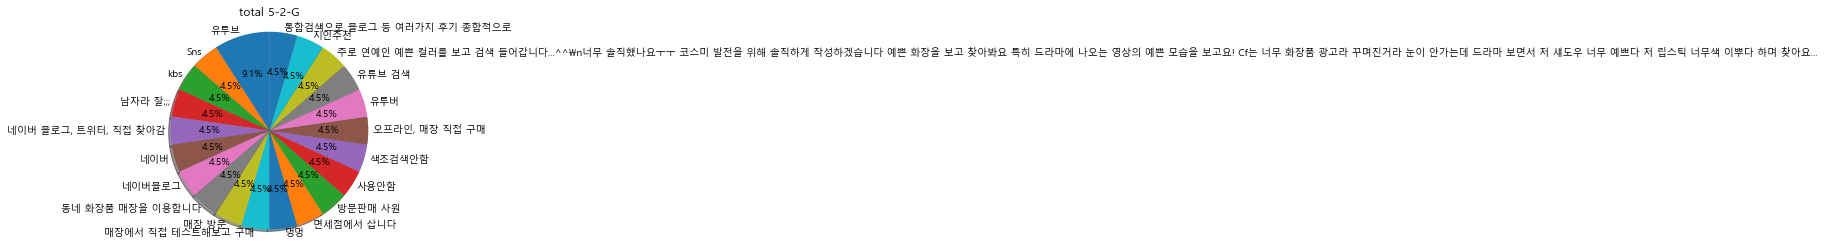

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-A
유저 수 : 259
답변 수(중복포함) : 259
Top 5


[('블로그/카페 후기', 178), ('공식 홈페이지', 49), ('이미지', 17), ('쇼핑몰', 11), ('기타', 4)]

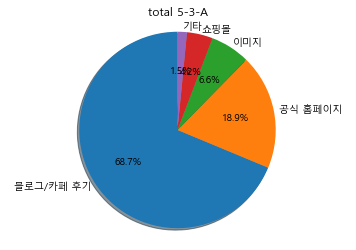

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-B
유저 수 : 69
답변 수(중복포함) : 69
Top 5


[('조회수가 많은 콘텐츠', 18),
 ('아는 유튜버의 콘텐츠', 16),
 ('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 16),
 ('상단에 뜨는 콘텐츠', 13),
 ('썸네일이 마음에 드는 콘텐츠', 6)]

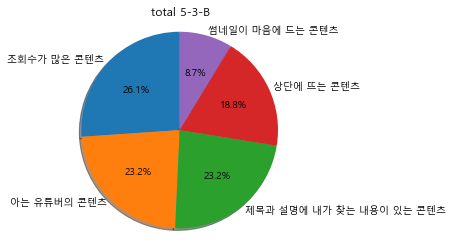

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-C
유저 수 : 243
답변 수(중복포함) : 243
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 110),
 ('이미지가 마음에 드는 콘텐츠', 66),
 ('상단에 뜨는 콘텐츠', 47),
 ('영상 콘텐츠', 20)]

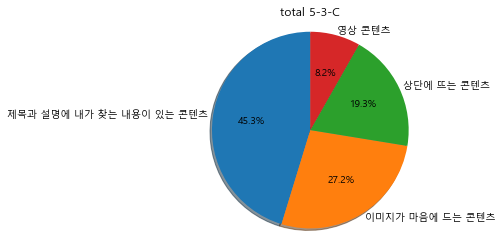

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-D
유저 수 : 147
답변 수(중복포함) : 147
Top 5


[('사용자 리뷰', 89), ('평점', 16), ('성분', 15), ('랭킹', 14), ('제품 정보', 12)]

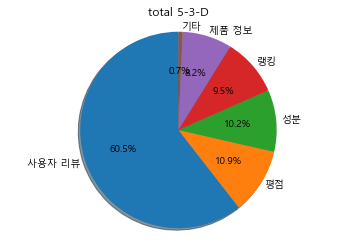

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-E
유저 수 : 63
답변 수(중복포함) : 63
Top 2


[('사용자 리뷰', 54), ('제품 정보', 9)]

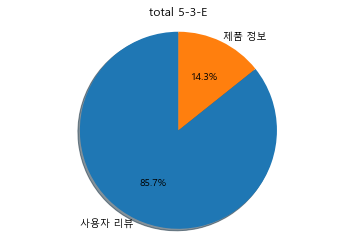

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-F
유저 수 : 94
답변 수(중복포함) : 94
Top 2


[('사용자 리뷰', 69), ('제품 정보', 25)]

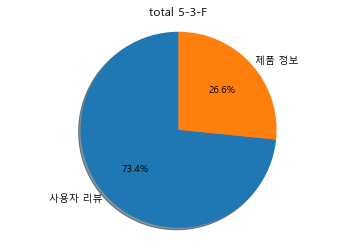

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-G
유저 수 : 22
답변 수(중복포함) : 22
Top 5


[('Heathy', 1),
 ('가장 검색하기 쉬운경로', 1),
 ('가장 후회가 없고 나한테 잘맞는걸 고를수있음', 1),
 ('국민바앙송~.~', 1),
 ('높은 신뢰도', 1)]

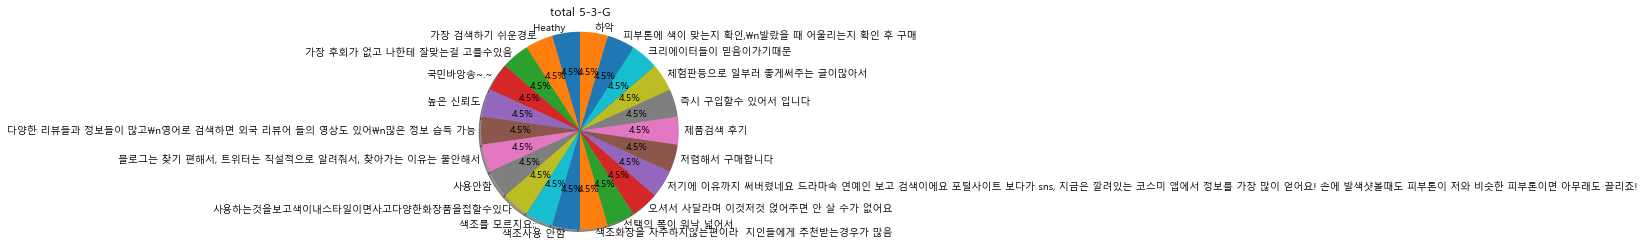

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-1-0
유저 수 : 779
답변 수(중복포함) : 2061
Top 5


[('효과', 573), ('가격', 487), ('성분', 401), ('제품 후기', 302), ('브랜드', 173)]

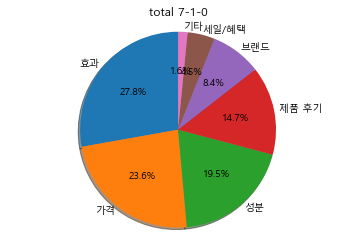

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-2-0
유저 수 : 779
답변 수(중복포함) : 2025
Top 2


[('기타', 1977), ('"', 48)]

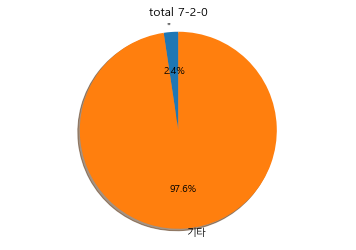

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-3-0
유저 수 : 779
답변 수(중복포함) : 779
Top 5


[('10,000~30,000원', 385),
 ('30,000~50,000원', 205),
 ('50,000~80,000원', 92),
 ('80,000원 이상', 52),
 ('10,000원 이하', 45)]

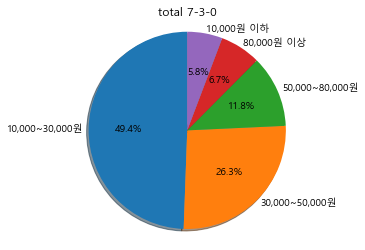

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-1-0
유저 수 : 730
답변 수(중복포함) : 1894
Top 5


[('발색', 484), ('가격', 456), ('지속력', 439), ('브랜드', 216), ('제품 후기', 215)]

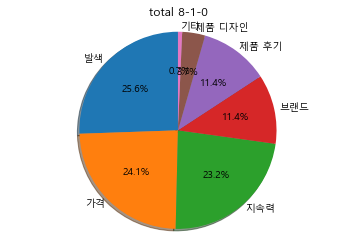

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-2-0
유저 수 : 730
답변 수(중복포함) : 1809
Top 3


[('기타', 1639), ('없음', 126), ('맥', 44)]

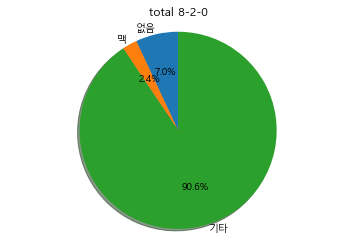

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-3-0
유저 수 : 730
답변 수(중복포함) : 730
Top 5


[('10,000~30,000원', 303),
 ('30,000~50,000원', 191),
 ('10,000원 이하', 158),
 ('50,000~80,000원', 58),
 ('80,000원 이상', 20)]

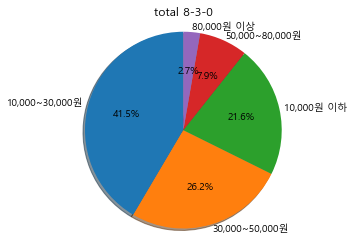

In [38]:
result_brand(total_tag, 'total',topN=8)

- 전체 포스팅 유저

In [39]:
missha = getTagSummary(postUserSurvey,'미샤')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


### 미샤 태그 사용 유저

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : age
유저 수 : 415
답변 수(중복포함) : 415
Top 5


[(30, 58.0), (28, 22.0), (29, 22.0), (26, 20.0), (25, 18.0)]

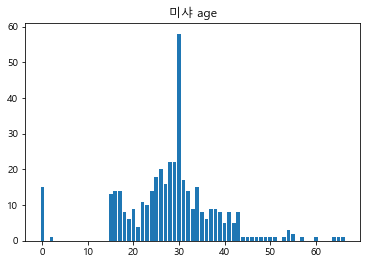

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : gender
유저 수 : 415
답변 수(중복포함) : 415
Top 3


[('FEMALE', 301.0), ('MALE', 99.0), ('#', 15.0)]

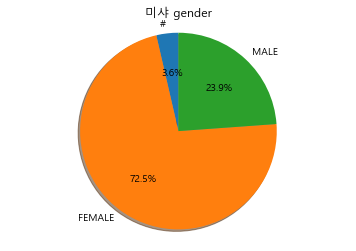

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinTone
유저 수 : 415
답변 수(중복포함) : 415
Top 4


[('MIDDLE', 220.0), ('BRIGHT', 130.0), ('DARK', 50.0), ('#', 15.0)]

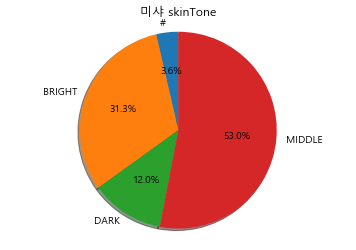

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinType
유저 수 : 415
답변 수(중복포함) : 415
Top 5


[('COMBINATION', 149.0),
 ('DRY', 92.0),
 ('OILY', 82.0),
 ('NORMAL', 77.0),
 ('#', 15.0)]

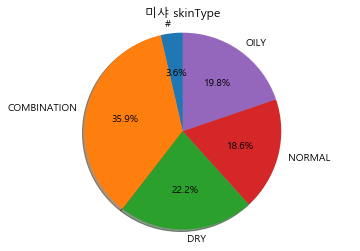

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinConcerns
유저 수 : 415
답변 수(중복포함) : 986
Top 5


[('BLACKHEAD', 206),
 ('DRY', 170),
 ('ACNE', 161),
 ('SENSITIVE', 156),
 ('WRINKLE', 148)]

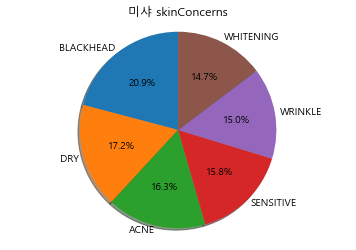

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-1-0
유저 수 : 230
답변 수(중복포함) : 230
Top 2


[('여자', 159), ('남자', 71)]

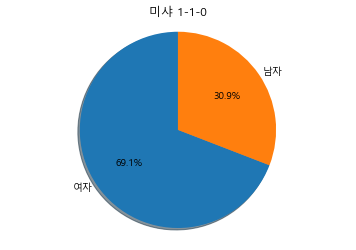

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-2-0
유저 수 : 230
답변 수(중복포함) : 230
Top 1


[('기타', 230)]

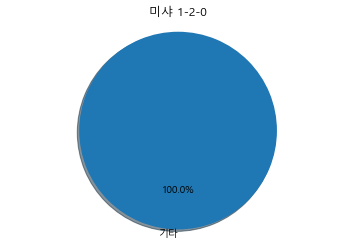

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-3-0
유저 수 : 230
답변 수(중복포함) : 460
Top 5


[('기타', 238), ('서울특별시', 76), ('경기도', 53), ('광주광역시', 17), ('전라남도', 16)]

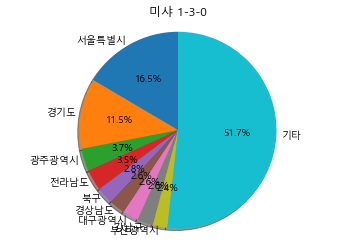

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-1-0
유저 수 : 142
답변 수(중복포함) : 142
Top 3


[('둘 다 이용함', 74), ('온라인', 40), ('오프라인', 28)]

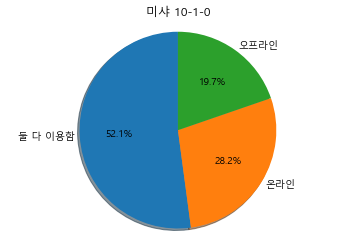

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-A
유저 수 : 40
답변 수(중복포함) : 40
Top 5


[('없음', 4), ('올리브영', 3), ('네이버', 2), ('네이버쇼핑', 2), ('지마켓', 2)]

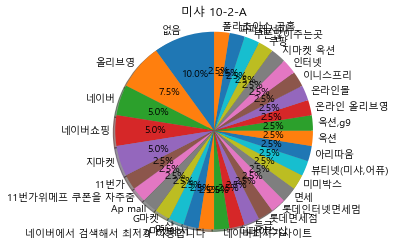

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-B
유저 수 : 28
답변 수(중복포함) : 28
Top 5


[('올리브영', 13), ('이니스프리', 3), ('백화점', 2), ('아리따움', 2), ('그런 이유로 가는 곳은 없음', 1)]

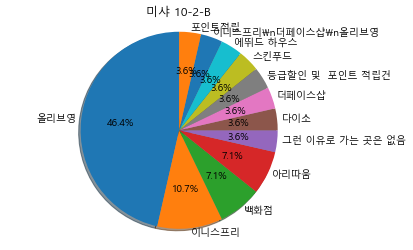

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-C
유저 수 : 74
답변 수(중복포함) : 74
Top 2


[('오프라인', 44), ('온라인', 30)]

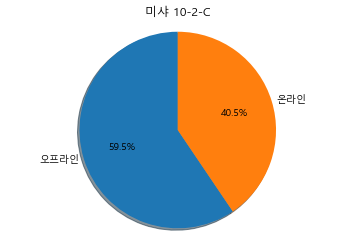

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-A
유저 수 : 40
답변 수(중복포함) : 40
Top 4


[('가격이 더 싸서', 30),
 ('매장에 가기 귀찮아서', 7),
 ('온라인에서만 파는 제품이라서', 2),
 ('매장에는 재고가 없기 때문에', 1)]

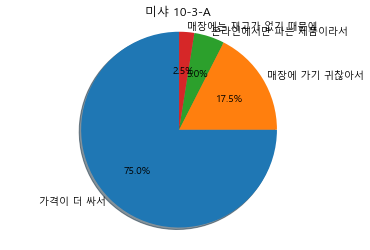

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-B
유저 수 : 28
답변 수(중복포함) : 28
Top 4


[('직접 제품을 체험해 보기 위해', 19),
 ('기다리기 싫어서', 6),
 ('온라인은 가품일 수 있어서', 2),
 ('가격이 저렴해서', 1)]

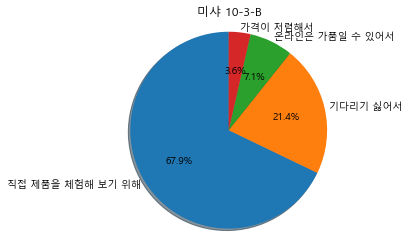

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-C
유저 수 : 74
답변 수(중복포함) : 74
Top 5


[('기타', 35), ('올리브영', 19), ('이니스프리', 5), ('토니모리', 4), ('미샤', 3)]

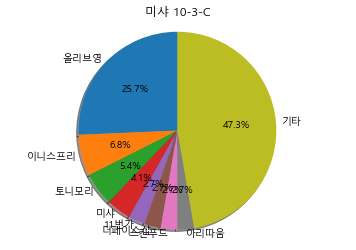

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-1-0
유저 수 : 135
답변 수(중복포함) : 135
Top 3


[('둘 다 이용함', 59), ('오프라인', 47), ('온라인', 29)]

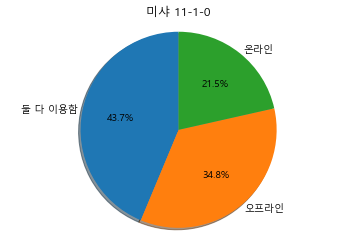

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-A
유저 수 : 29
답변 수(중복포함) : 29
Top 5


[('지마켓', 5), ('올리브영', 4), ('11번가', 3), ('네이버쇼핑', 3), ('포인트', 3)]

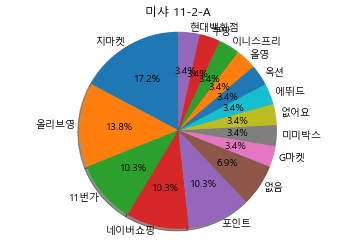

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-B
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('올리브영', 12), ('아리따움', 6), ('이니스프리', 5), ('미샤', 2), ('백화점', 2)]

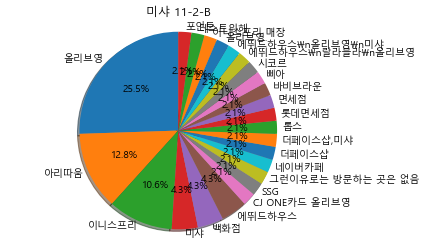

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-C
유저 수 : 59
답변 수(중복포함) : 59
Top 2


[('오프라인', 37), ('온라인', 22)]

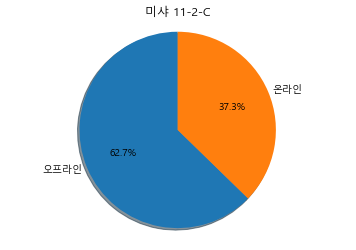

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-A
유저 수 : 29
답변 수(중복포함) : 29
Top 3


[('가격이 더 싸서', 22), ('매장에 가기 귀찮아서', 5), ('매장에는 재고가 없기 때문에', 2)]

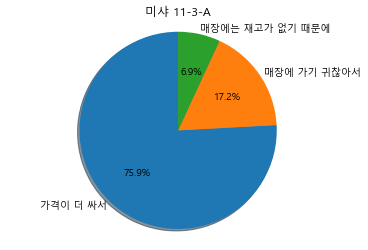

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-B
유저 수 : 47
답변 수(중복포함) : 47
Top 4


[('직접 제품을 체험해 보기 위해', 42),
 ('기다리기 싫어서', 3),
 ('온라인은 가품일 수 있어서', 1),
 ('포인트가 잘쌓임', 1)]

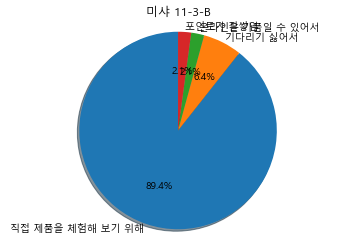

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-C
유저 수 : 59
답변 수(중복포함) : 59
Top 5


[('기타', 39), ('올리브영', 7), ('미샤', 5), ('네이처리퍼블릭', 2), ('아리따움', 2)]

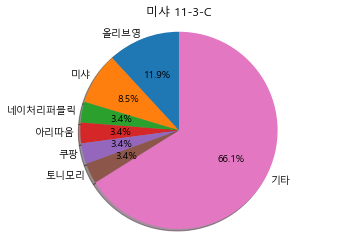

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-1-0
유저 수 : 196
답변 수(중복포함) : 196
Top 5


[('복합성', 71), ('건성', 58), ('지성', 41), ('중성', 22), ('잘 모르겠음', 4)]

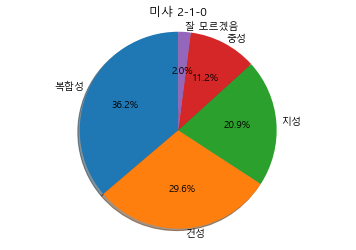

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-2-0
유저 수 : 196
답변 수(중복포함) : 196
Top 4


[('중간 톤', 113), ('밝은 톤', 56), ('어두운 톤', 25), ('기타', 2)]

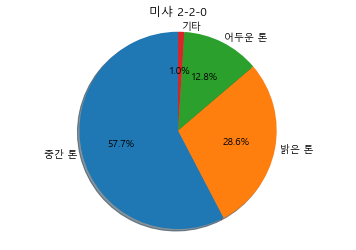

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-3-0
유저 수 : 196
답변 수(중복포함) : 459
Top 5


[('주름/탄력', 96), ('건조', 89), ('블랙헤드/피지', 82), ('미백', 73), ('여드름', 61)]

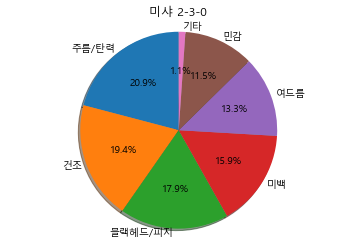

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-1-0
유저 수 : 190
답변 수(중복포함) : 430
Top 5


[('SNS (인스타그램/블로그 등)', 126),
 ('TV', 88),
 ('비디오 플랫폼 (유튜브 등)', 86),
 ('온라인 쇼핑', 65),
 ('커뮤니티', 54)]

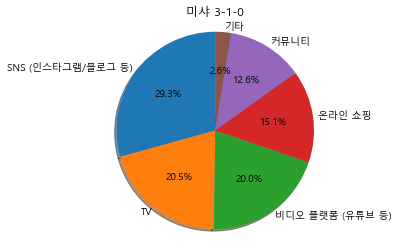

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-A
유저 수 : 59
답변 수(중복포함) : 59
Top 5


[('TVN', 17), ('JTBC', 14), ('SBS', 14), ('MBC', 8), ('KBS', 5)]

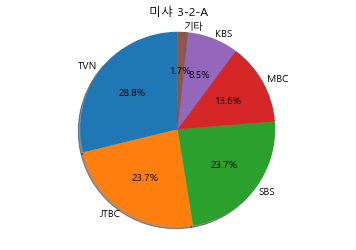

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-B
유저 수 : 75
답변 수(중복포함) : 144
Top 5


[('인스타그램', 60), ('페이스북', 41), ('블로그', 32), ('트위터', 6), ('기타', 5)]

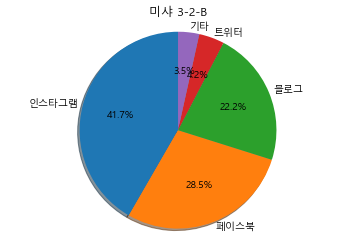

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-C
유저 수 : 27
답변 수(중복포함) : 44
Top 5


[('유튜브', 26), ('네이버 TV', 9), ('카카오 TV', 6), ('아프리카', 2), ('기타', 1)]

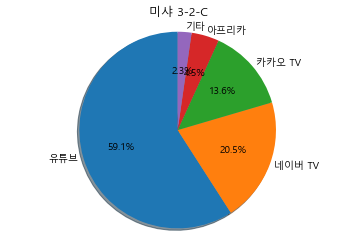

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-D
유저 수 : 15
답변 수(중복포함) : 27
Top 5


[('네이트 판', 6), ('파우더룸', 5), ('기타', 5), ('여성시대', 4), ('쭉방카페', 3)]

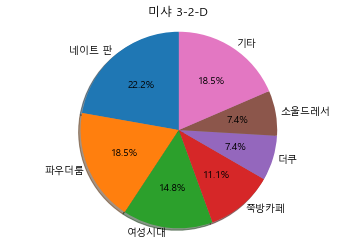

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-E
유저 수 : 9
답변 수(중복포함) : 22
Top 5


[('네이버 쇼핑', 6),
 ('종합 쇼핑몰(신세계몰, CJmall 등)', 6),
 ('오픈마켓(G마켓, 11번가, 쿠팡 )', 6),
 ('드럭스토어(올리브영 등)', 3),
 ('기타', 1)]

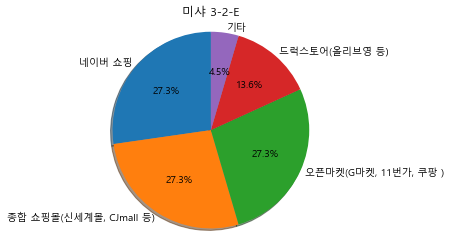

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-F
유저 수 : 5
답변 수(중복포함) : 5
Top 5


[('Sns', 1),
 ('라디오 들으면서 일상 생활하기', 1),
 ('유튜브나 드라마 보기, 학교 과제', 1),
 ('음악감상이나 유투브', 1),
 ('코스미', 1)]

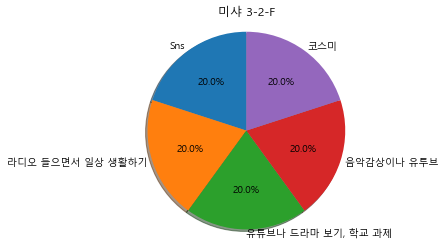

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-3-0
유저 수 : 190
답변 수(중복포함) : 190
Top 5


[('SNS', 72), ('화장품 리뷰 앱', 32), ('포털사이트', 24), ('커뮤니티', 20), ('TV', 17)]

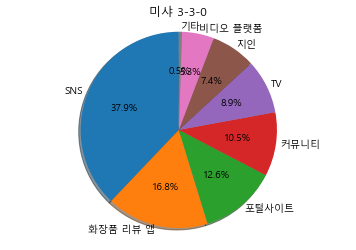

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-1-0
유저 수 : 186
답변 수(중복포함) : 186
Top 5


[('포털사이트', 51), ('SNS', 46), ('화장품 리뷰 앱', 36), ('쇼핑몰 후기', 24), ('커뮤니티', 12)]

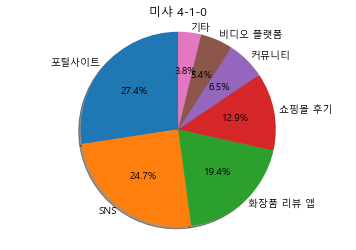

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-A
유저 수 : 51
답변 수(중복포함) : 51
Top 4


[('네이버', 44), ('다음', 4), ('구글', 2), ('기타', 1)]

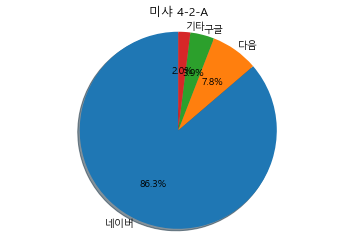

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-B
유저 수 : 10
답변 수(중복포함) : 10
Top 2


[('유튜브', 9), ('카카오 TV', 1)]

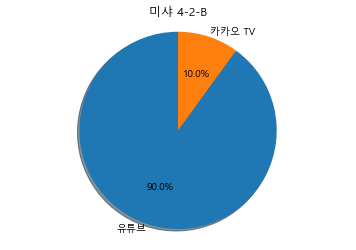

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-C
유저 수 : 46
답변 수(중복포함) : 46
Top 5


[('인스타그램', 15), ('블로그', 13), ('페이스북', 11), ('트위터', 4), ('네이버', 1)]

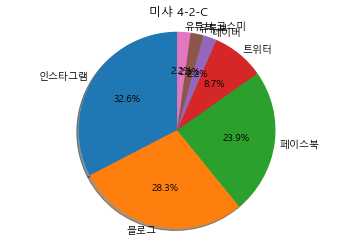

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-D
유저 수 : 36
답변 수(중복포함) : 36
Top 5


[('화해', 22), ('글로우픽', 6), ('파우더룸', 6), ('언니의파우치', 1), ('코스미', 1)]

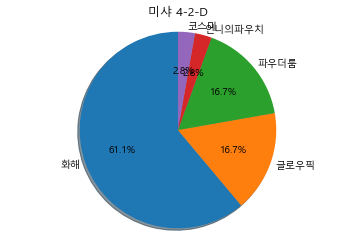

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-E
유저 수 : 12
답변 수(중복포함) : 12
Top 5


[('여성시대', 4), ('파우더룸', 4), ('쌍화차코코아', 2), ('네이버블로그', 1), ('네이트 판', 1)]

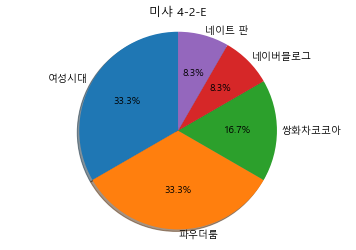

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-F
유저 수 : 24
답변 수(중복포함) : 24
Top 4


[('오픈마켓(G마켓, 11번가, 쿠팡)', 10),
 ('네이버 쇼핑', 6),
 ('브랜드 공식 홈페이지', 6),
 ('드럭스토어(올리브영 등)', 2)]

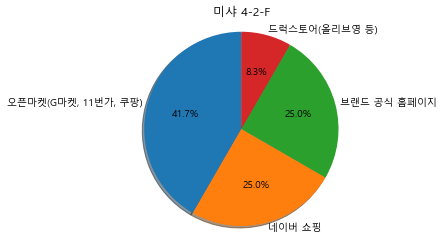

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-G
유저 수 : 7
답변 수(중복포함) : 7
Top 5


[('네이버', 2), ('Sns', 1), ('없음', 1), ('오프라인 샵', 1), ('인터넷 검색', 1)]

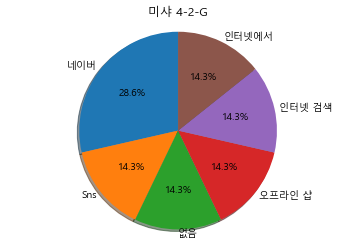

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-A
유저 수 : 51
답변 수(중복포함) : 51
Top 5


[('블로그/카페 후기', 39), ('공식 홈페이지', 7), ('쇼핑몰', 2), ('이미지', 2), ('기타', 1)]

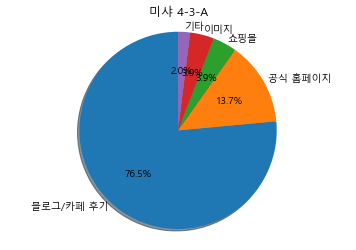

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-B
유저 수 : 10
답변 수(중복포함) : 10
Top 4


[('아는 유튜버의 콘텐츠', 5),
 ('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 2),
 ('조회수가 많은 콘텐츠', 2),
 ('이미지가 마음에 드는 콘텐츠', 1)]

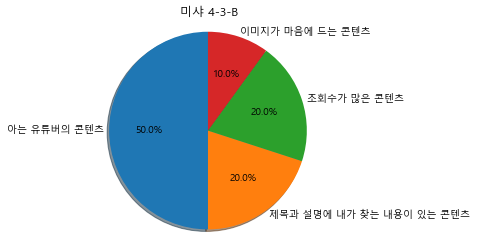

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-C
유저 수 : 46
답변 수(중복포함) : 46
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 23),
 ('상단에 뜨는 콘텐츠', 9),
 ('이미지가 마음에 드는 콘텐츠', 9),
 ('영상 콘텐츠', 5)]

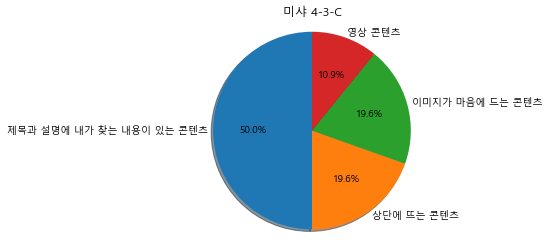

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-D
유저 수 : 36
답변 수(중복포함) : 36
Top 5


[('사용자 리뷰', 22), ('성분', 5), ('랭킹', 4), ('평점', 3), ('제품 정보', 2)]

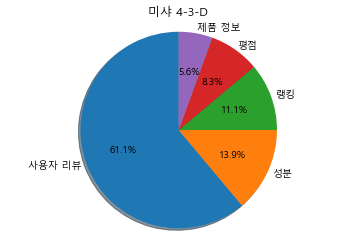

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-E
유저 수 : 12
답변 수(중복포함) : 12
Top 2


[('사용자 리뷰', 10), ('제품 정보', 2)]

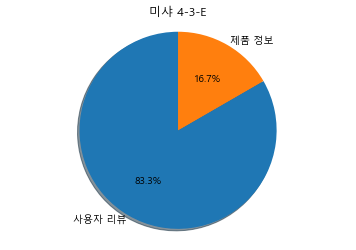

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-F
유저 수 : 24
답변 수(중복포함) : 24
Top 2


[('사용자 리뷰', 14), ('제품 정보', 10)]

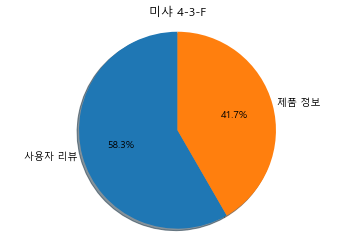

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-G
유저 수 : 7
답변 수(중복포함) : 7
Top 5


[('11번가', 1),
 ('happy', 1),
 ('다양한 제품을 검색하고 가격과 사용후기를', 1),
 ('매일써서', 1),
 ('상담과 체험', 1)]

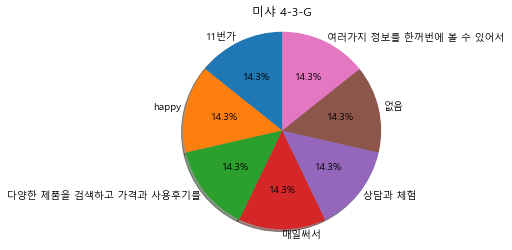

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-1-0
유저 수 : 181
답변 수(중복포함) : 181
Top 5


[('SNS', 47), ('포털사이트', 47), ('쇼핑몰 후기', 27), ('화장품 리뷰 앱', 27), ('비디오 플랫폼', 15)]

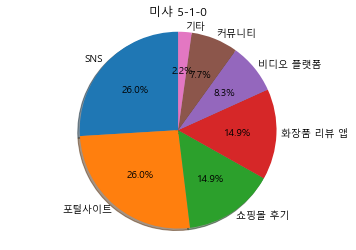

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-A
유저 수 : 47
답변 수(중복포함) : 47
Top 4


[('네이버', 41), ('다음', 4), ('구글', 1), ('네이트', 1)]

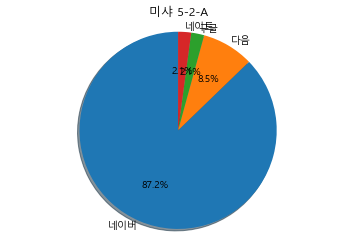

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-B
유저 수 : 15
답변 수(중복포함) : 15
Top 2


[('유튜브', 13), ('네이버 TV', 2)]

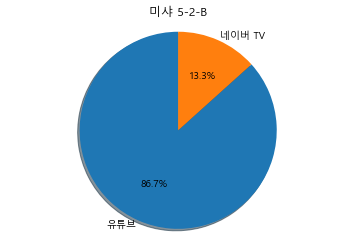

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-C
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('인스타그램', 23), ('블로그', 13), ('페이스북', 8), ('네이버', 1), ('유튜브', 1)]

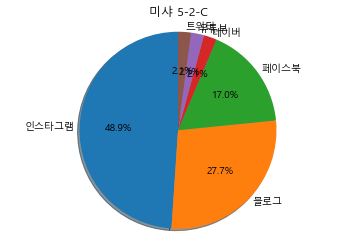

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-D
유저 수 : 27
답변 수(중복포함) : 27
Top 4


[('화해', 15), ('파우더룸', 6), ('글로우픽', 5), ('스타일쉐어', 1)]

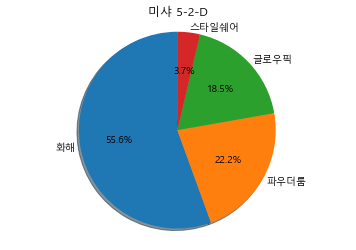

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-E
유저 수 : 14
답변 수(중복포함) : 14
Top 5


[('여성시대', 4), ('인스티즈', 3), ('네이트 판', 1), ('더쿠', 1), ('디미토리', 1)]

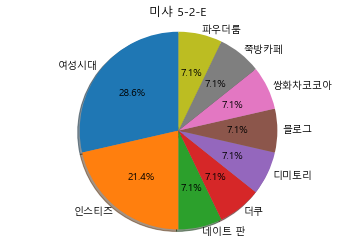

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-F
유저 수 : 27
답변 수(중복포함) : 27
Top 5


[('네이버 쇼핑', 12),
 ('오픈마켓(G마켓', 5),
 ('브랜드 공식 홈페이지', 4),
 ('드럭스토어(올리브영 등)', 3),
 ('11번가', 1)]

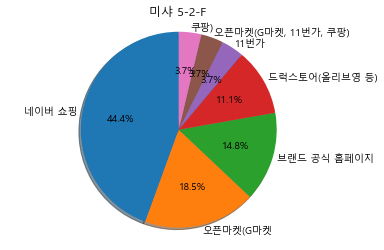

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-G
유저 수 : 4
답변 수(중복포함) : 4
Top 4


[('Sns', 1),
 ('멍멍', 1),
 ('유투버', 1),
 ('주로 연예인 예쁜 컬러를 보고 검색 들어갑니다...^^\\n너무 솔직했나요ㅜㅜ 코스미 발전을 위해 솔직하게 작성하겠습니다 예쁜 화장을 보고 찾아봐요 특히 드라마에 나오는 영상의 예쁜 모습을 보고요! Cf는 너무 화장품 광고라 꾸며진거라 눈이 안가는데 드라마 보면서 저 섀도우 너무 예쁘다 저 립스틱 너무색 이뿌다 하며 찾아요...',
  1)]

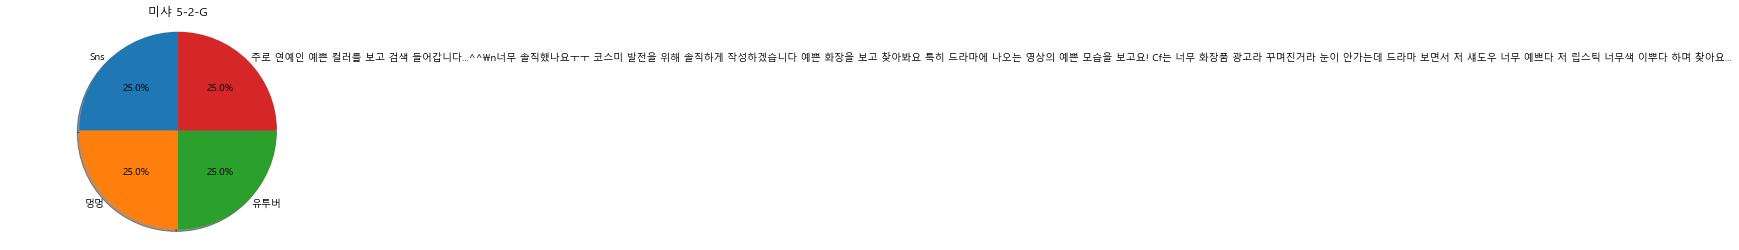

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-A
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('블로그/카페 후기', 35), ('이미지', 7), ('공식 홈페이지', 3), ('기사', 1), ('쇼핑몰', 1)]

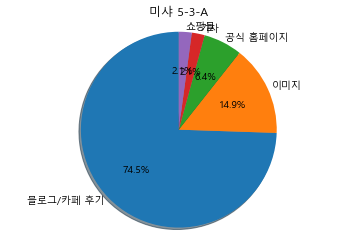

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-B
유저 수 : 15
답변 수(중복포함) : 15
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 6),
 ('아는 유튜버의 콘텐츠', 5),
 ('조회수가 많은 콘텐츠', 3),
 ('상단에 뜨는 콘텐츠', 1)]

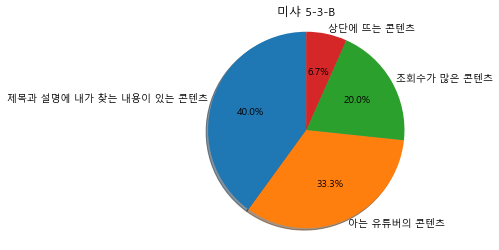

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-C
유저 수 : 47
답변 수(중복포함) : 47
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 23),
 ('이미지가 마음에 드는 콘텐츠', 12),
 ('상단에 뜨는 콘텐츠', 8),
 ('영상 콘텐츠', 4)]

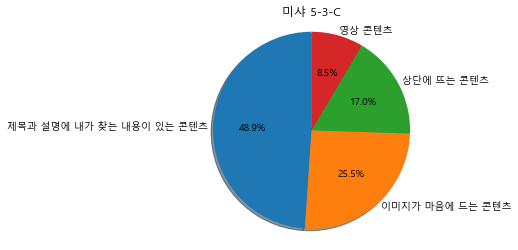

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-D
유저 수 : 27
답변 수(중복포함) : 27
Top 5


[('사용자 리뷰', 18), ('평점', 4), ('랭킹', 3), ('성분', 1), ('제품 정보', 1)]

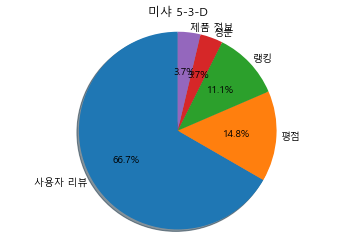

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-E
유저 수 : 14
답변 수(중복포함) : 14
Top 2


[('사용자 리뷰', 11), ('제품 정보', 3)]

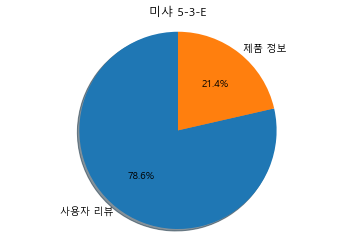

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-F
유저 수 : 27
답변 수(중복포함) : 27
Top 2


[('사용자 리뷰', 20), ('제품 정보', 7)]

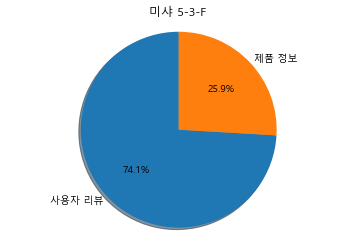

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-G
유저 수 : 4
답변 수(중복포함) : 4
Top 4


[('Heathy', 1),
 ('높은 신뢰도', 1),
 ('저기에 이유까지 써버렸네요 드라마속 연예인 보고 검색이에요 포털사이트 보다가 sns, 지금은 깔려있는 코스미 앱에서 정보를 가장 많이 얻어요! 손에 발색샷볼때도 피부톤이 저와 비슷한 피부톤이면 아무래도 끌리죠!',
  1),
 ('하악', 1)]

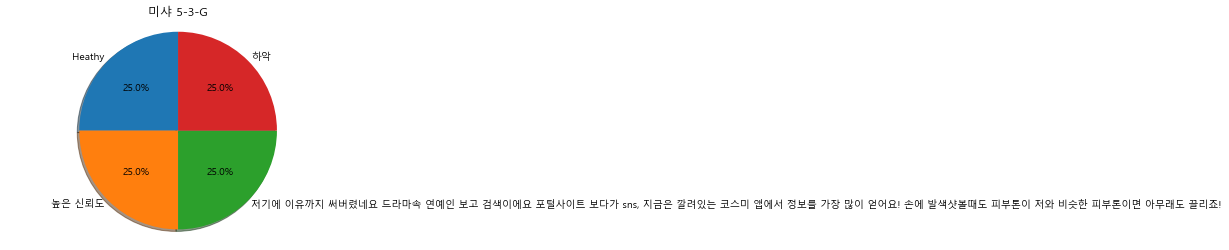

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-1-0
유저 수 : 162
답변 수(중복포함) : 428
Top 5


[('효과', 124), ('가격', 97), ('성분', 78), ('제품 후기', 63), ('브랜드', 34)]

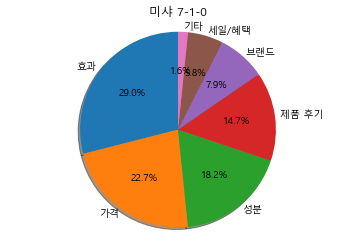

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-2-0
유저 수 : 162
답변 수(중복포함) : 421
Top 2


[('기타', 412), ('"', 9)]

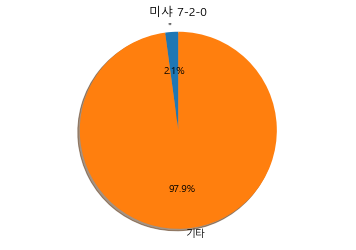

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-3-0
유저 수 : 162
답변 수(중복포함) : 162
Top 5


[('10,000~30,000원', 80),
 ('30,000~50,000원', 43),
 ('50,000~80,000원', 19),
 ('10,000원 이하', 10),
 ('80,000원 이상', 10)]

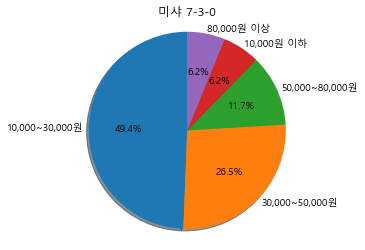

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-1-0
유저 수 : 153
답변 수(중복포함) : 411
Top 5


[('발색', 113), ('가격', 98), ('지속력', 92), ('브랜드', 45), ('제품 후기', 44)]

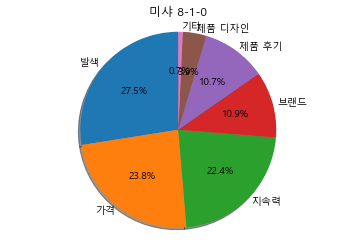

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-2-0
유저 수 : 153
답변 수(중복포함) : 374
Top 4


[('기타', 316), ('없음', 26), ('맥', 16), ('미샤', 16)]

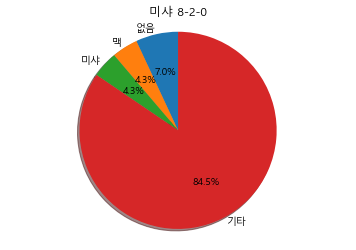

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-3-0
유저 수 : 153
답변 수(중복포함) : 153
Top 5


[('10,000~30,000원', 51),
 ('30,000~50,000원', 47),
 ('10,000원 이하', 42),
 ('50,000~80,000원', 11),
 ('기타', 2)]

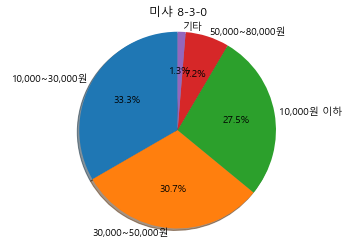

In [40]:
result_brand(missha, '미샤')

- 미샤 태그 포스팅 유저

In [41]:
innisfree = getTagSummary(postUserSurvey,'이니스프리')

C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
C:\Users\dongm\Anaconda3\lib\site-packages\pandas\core\frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


### 이니스프리 태그 사용 유저

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : age
유저 수 : 828
답변 수(중복포함) : 828
Top 5


[(30, 110.0), (15, 40.0), (31, 39.0), (26, 38.0), (0, 36.0)]

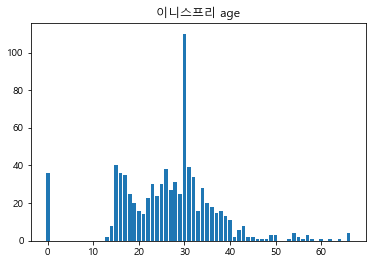

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : gender
유저 수 : 828
답변 수(중복포함) : 828
Top 3


[('FEMALE', 571.0), ('MALE', 221.0), ('#', 36.0)]

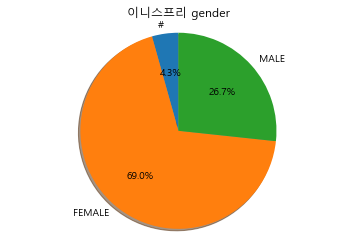

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinTone
유저 수 : 828
답변 수(중복포함) : 828
Top 4


[('MIDDLE', 444.0), ('BRIGHT', 233.0), ('DARK', 115.0), ('#', 36.0)]

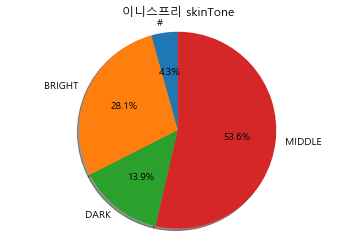

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinType
유저 수 : 828
답변 수(중복포함) : 828
Top 5


[('COMBINATION', 301.0),
 ('DRY', 185.0),
 ('OILY', 159.0),
 ('NORMAL', 147.0),
 ('#', 36.0)]

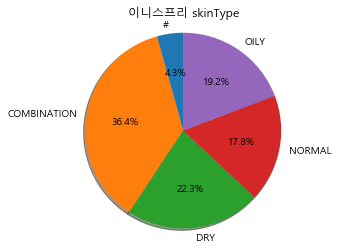

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : skinConcerns
유저 수 : 828
답변 수(중복포함) : 1961
Top 5


[('BLACKHEAD', 439),
 ('DRY', 349),
 ('ACNE', 342),
 ('WHITENING', 299),
 ('SENSITIVE', 290)]

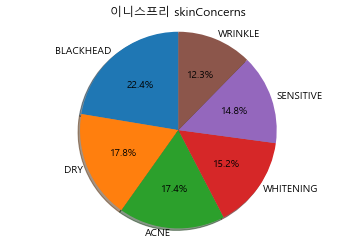

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-1-0
유저 수 : 395
답변 수(중복포함) : 395
Top 2


[('여자', 247), ('남자', 148)]

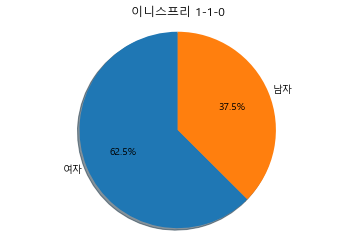

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-2-0
유저 수 : 395
답변 수(중복포함) : 395
Top 1


[('기타', 395)]

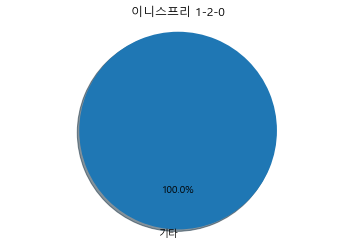

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 1-3-0
유저 수 : 395
답변 수(중복포함) : 790
Top 5


[('기타', 449), ('서울특별시', 138), ('경기도', 65), ('전라남도', 30), ('부산광역시', 28)]

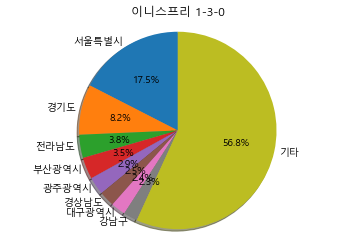

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-1-0
유저 수 : 238
답변 수(중복포함) : 238
Top 3


[('둘 다 이용함', 112), ('온라인', 74), ('오프라인', 52)]

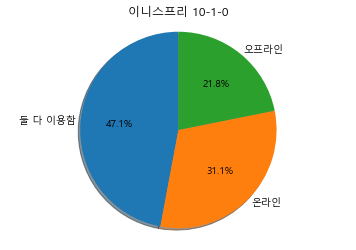

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-A
유저 수 : 74
답변 수(중복포함) : 74
Top 5


[('기타', 33), ('이니스프리', 5), ('쿠팡', 5), ('없음', 4), ('옥션', 4)]

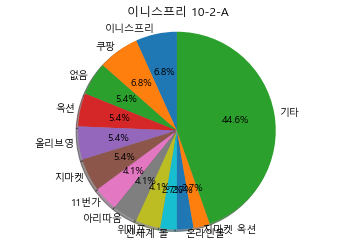

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-B
유저 수 : 52
답변 수(중복포함) : 52
Top 5


[('올리브영', 21), ('기타', 14), ('이니스프리', 8), ('아리따움', 5), ('백화점', 4)]

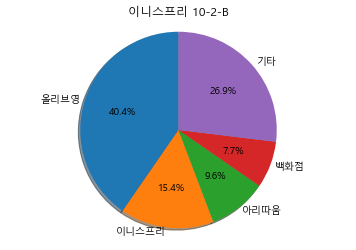

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-2-C
유저 수 : 112
답변 수(중복포함) : 112
Top 2


[('온라인', 57), ('오프라인', 55)]

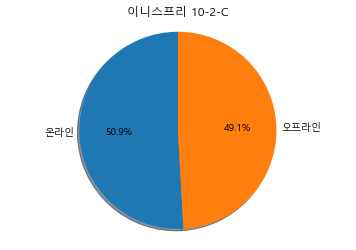

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-A
유저 수 : 74
답변 수(중복포함) : 74
Top 3


[('가격이 더 싸서', 48), ('매장에 가기 귀찮아서', 23), ('기타', 3)]

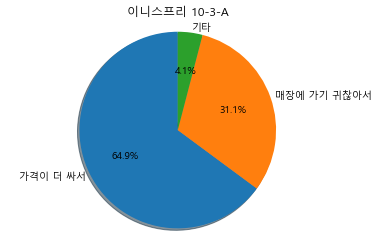

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-B
유저 수 : 52
답변 수(중복포함) : 52
Top 4


[('직접 제품을 체험해 보기 위해', 37), ('기다리기 싫어서', 10), ('온라인은 가품일 수 있어서', 4), ('기타', 1)]

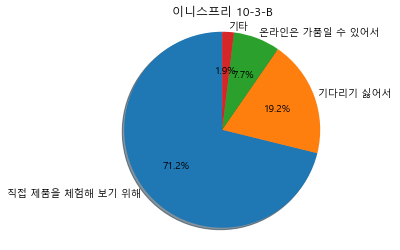

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 10-3-C
유저 수 : 112
답변 수(중복포함) : 112
Top 5


[('기타', 74), ('올리브영', 20), ('이니스프리', 10), ('11번가', 4), ('토니모리', 4)]

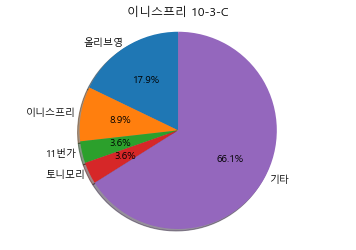

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-1-0
유저 수 : 229
답변 수(중복포함) : 229
Top 3


[('둘 다 이용함', 98), ('오프라인', 77), ('온라인', 54)]

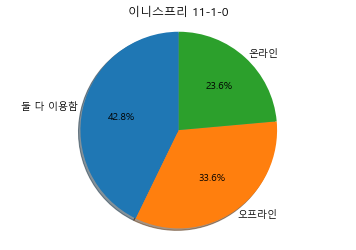

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-A
유저 수 : 54
답변 수(중복포함) : 54
Top 5


[('기타', 20), ('11번가', 6), ('올리브영', 6), ('옥션', 4), ('없음', 3)]

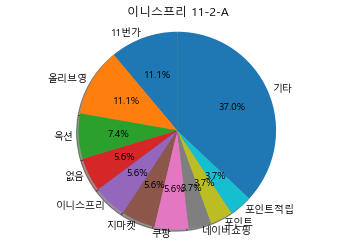

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-B
유저 수 : 77
답변 수(중복포함) : 77
Top 5


[('기타', 30), ('올리브영', 19), ('아리따움', 8), ('이니스프리', 8), ('백화점', 4)]

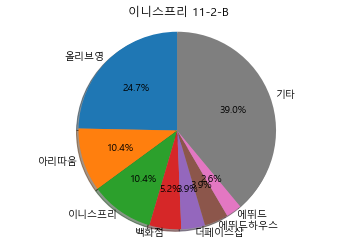

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-2-C
유저 수 : 98
답변 수(중복포함) : 98
Top 2


[('오프라인', 53), ('온라인', 45)]

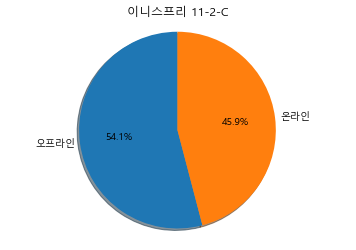

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-A
유저 수 : 54
답변 수(중복포함) : 54
Top 3


[('가격이 더 싸서', 42), ('매장에 가기 귀찮아서', 8), ('기타', 4)]

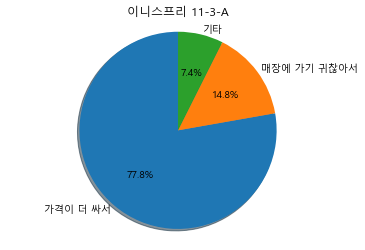

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-B
유저 수 : 77
답변 수(중복포함) : 77
Top 4


[('직접 제품을 체험해 보기 위해', 68), ('기다리기 싫어서', 3), ('온라인은 가품일 수 있어서', 3), ('기타', 3)]

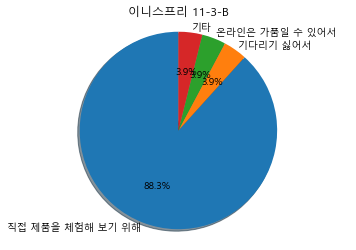

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 11-3-C
유저 수 : 98
답변 수(중복포함) : 98
Top 5


[('기타', 52), ('올리브영', 16), ('11번가', 4), ('미샤', 4), ('에뛰드하우스', 4)]

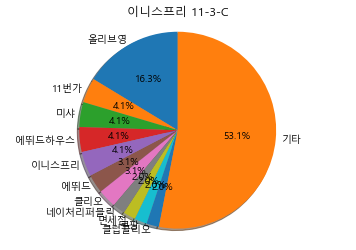

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-1-0
유저 수 : 340
답변 수(중복포함) : 340
Top 5


[('복합성', 131), ('건성', 103), ('지성', 69), ('중성', 29), ('잘 모르겠음', 8)]

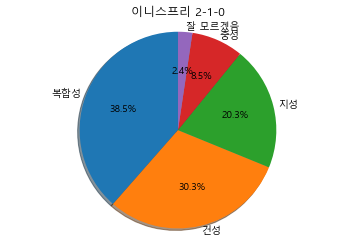

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-2-0
유저 수 : 340
답변 수(중복포함) : 340
Top 4


[('중간 톤', 189), ('밝은 톤', 96), ('어두운 톤', 52), ('기타', 3)]

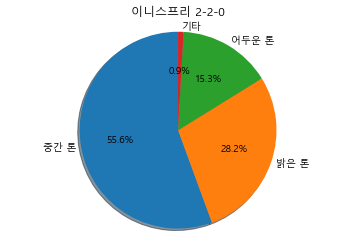

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 2-3-0
유저 수 : 340
답변 수(중복포함) : 799
Top 5


[('블랙헤드/피지', 155), ('건조', 151), ('주름/탄력', 146), ('여드름', 119), ('미백', 113)]

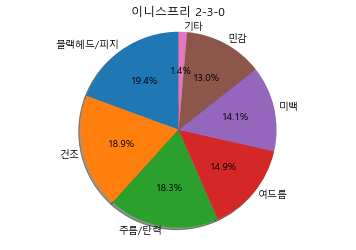

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-1-0
유저 수 : 324
답변 수(중복포함) : 727
Top 5


[('SNS (인스타그램/블로그 등)', 220),
 ('TV', 139),
 ('비디오 플랫폼 (유튜브 등)', 137),
 ('온라인 쇼핑', 113),
 ('커뮤니티', 97)]

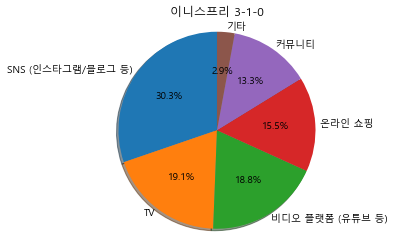

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-A
유저 수 : 98
답변 수(중복포함) : 98
Top 5


[('TVN', 28), ('JTBC', 27), ('SBS', 18), ('MBC', 12), ('KBS', 8)]

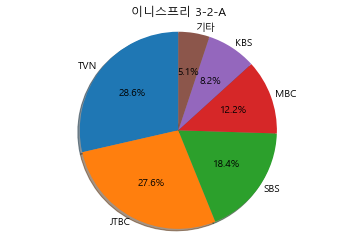

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-B
유저 수 : 130
답변 수(중복포함) : 242
Top 5


[('인스타그램', 109), ('페이스북', 62), ('블로그', 51), ('트위터', 14), ('기타', 6)]

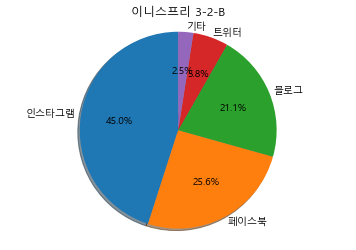

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-C
유저 수 : 40
답변 수(중복포함) : 64
Top 5


[('유튜브', 38), ('네이버 TV', 12), ('카카오 TV', 7), ('아프리카', 5), ('기타', 2)]

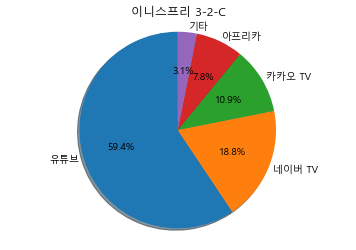

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-D
유저 수 : 27
답변 수(중복포함) : 50
Top 5


[('파우더룸', 12), ('기타', 11), ('네이트 판', 9), ('여성시대', 6), ('더쿠', 6)]

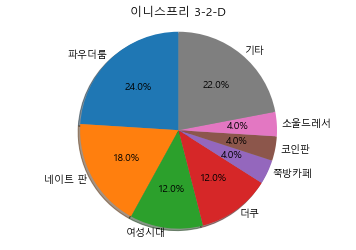

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-E
유저 수 : 24
답변 수(중복포함) : 54
Top 5


[('네이버 쇼핑', 15),
 ('종합 쇼핑몰(신세계몰, CJmall 등)', 14),
 ('오픈마켓(G마켓, 11번가, 쿠팡 )', 13),
 ('드럭스토어(올리브영 등)', 7),
 ('브랜드 공식 홈페이지', 5)]

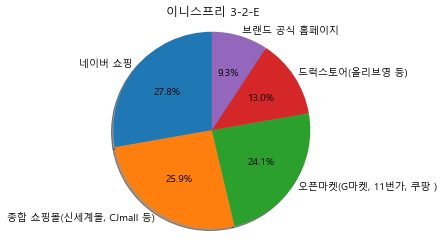

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-2-F
유저 수 : 5
답변 수(중복포함) : 5
Top 5


[('Sns', 1),
 ('명상', 1),
 ('운동, 게임', 1),
 ('유튜브 많이 봅니다!', 1),
 ('유튜브나 드라마 보기, 학교 과제', 1)]

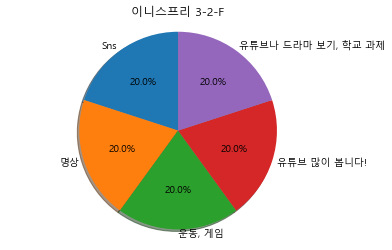

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 3-3-0
유저 수 : 324
답변 수(중복포함) : 324
Top 5


[('SNS', 111), ('화장품 리뷰 앱', 64), ('포털사이트', 35), ('커뮤니티', 33), ('지인', 32)]

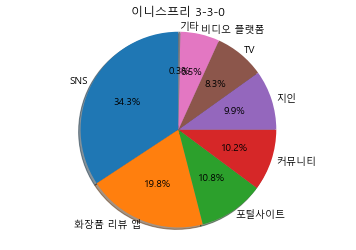

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-1-0
유저 수 : 307
답변 수(중복포함) : 307
Top 5


[('포털사이트', 85), ('SNS', 71), ('화장품 리뷰 앱', 70), ('쇼핑몰 후기', 33), ('커뮤니티', 22)]

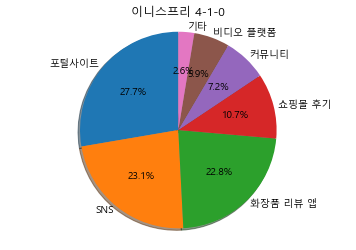

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-A
유저 수 : 85
답변 수(중복포함) : 85
Top 3


[('네이버', 79), ('다음', 4), ('기타', 2)]

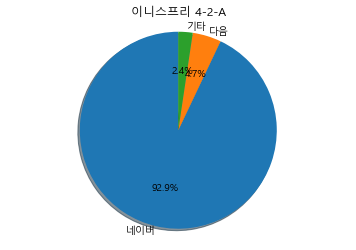

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-B
유저 수 : 18
답변 수(중복포함) : 18
Top 3


[('유튜브', 14), ('카카오 TV', 3), ('네이버 TV', 1)]

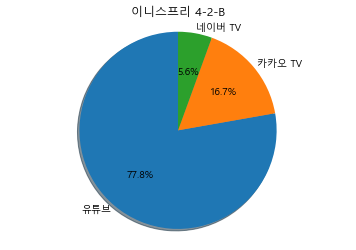

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-C
유저 수 : 71
답변 수(중복포함) : 71
Top 4


[('인스타그램', 35), ('블로그', 16), ('페이스북', 15), ('트위터', 5)]

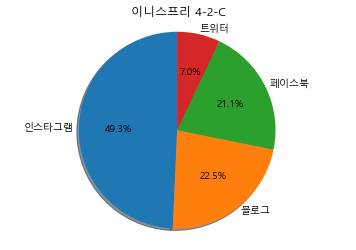

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-D
유저 수 : 70
답변 수(중복포함) : 70
Top 5


[('화해', 44), ('글로우픽', 11), ('언니의파우치', 6), ('파우더룸', 6), ('코스미', 2)]

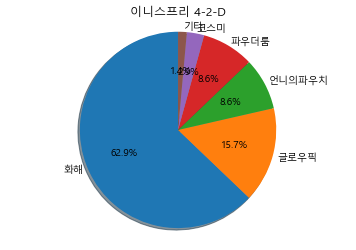

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-E
유저 수 : 22
답변 수(중복포함) : 22
Top 5


[('파우더룸', 6), ('네이트 판', 3), ('여성시대', 3), ('디젤매니아', 2), ('쌍화차코코아', 2)]

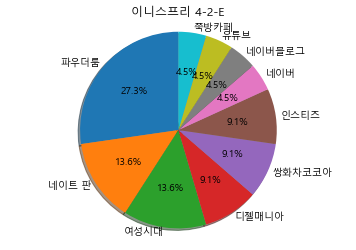

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-F
유저 수 : 33
답변 수(중복포함) : 33
Top 5


[('네이버 쇼핑', 13),
 ('오픈마켓(G마켓, 11번가, 쿠팡)', 8),
 ('브랜드 공식 홈페이지', 7),
 ('드럭스토어(올리브영 등)', 2),
 ('종합 쇼핑몰(신세계몰,CJmall 등)', 2)]

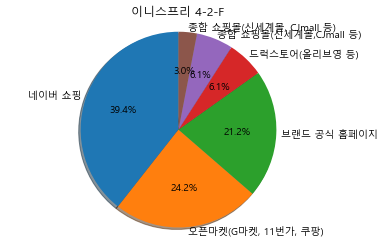

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-2-G
유저 수 : 8
답변 수(중복포함) : 8
Top 5


[('네이버', 2),
 ('Sns', 1),
 ('sbs', 1),
 ('딸들이 사다 줍니다', 1),
 ('매장 방문 후, 상담 후에 추천받아 구입', 1)]

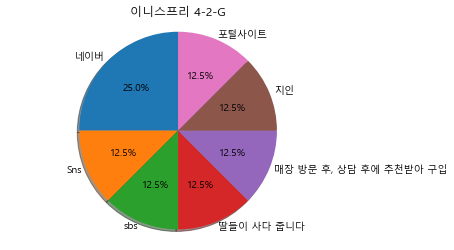

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-A
유저 수 : 85
답변 수(중복포함) : 85
Top 5


[('블로그/카페 후기', 71), ('공식 홈페이지', 6), ('기사', 3), ('쇼핑몰', 3), ('이미지', 2)]

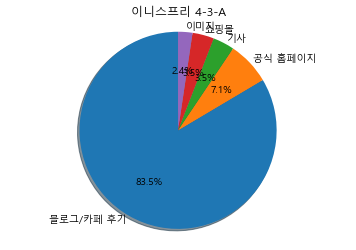

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-B
유저 수 : 18
답변 수(중복포함) : 18
Top 5


[('아는 유튜버의 콘텐츠', 6),
 ('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 6),
 ('조회수가 많은 콘텐츠', 3),
 ('이미지가 마음에 드는 콘텐츠', 2),
 ('상단에 뜨는 콘텐츠', 1)]

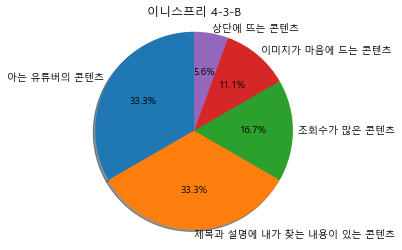

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-C
유저 수 : 71
답변 수(중복포함) : 71
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 32),
 ('상단에 뜨는 콘텐츠', 16),
 ('이미지가 마음에 드는 콘텐츠', 16),
 ('영상 콘텐츠', 7)]

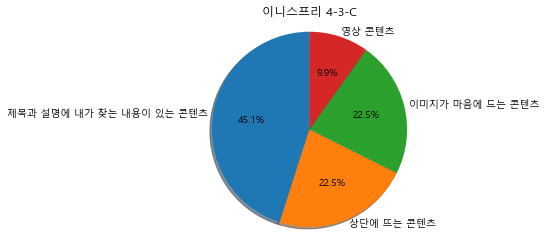

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-D
유저 수 : 70
답변 수(중복포함) : 70
Top 5


[('사용자 리뷰', 36), ('성분', 11), ('평점', 11), ('랭킹', 10), ('제품 정보', 2)]

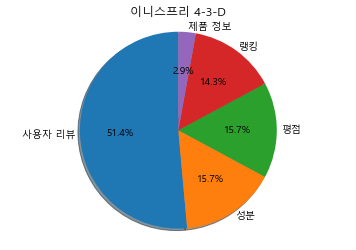

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-E
유저 수 : 22
답변 수(중복포함) : 22
Top 3


[('사용자 리뷰', 18), ('제품 정보', 3), ('가성비', 1)]

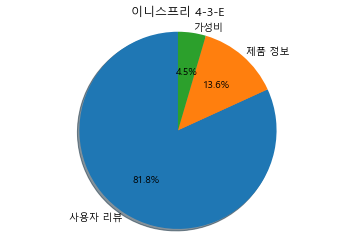

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-F
유저 수 : 33
답변 수(중복포함) : 33
Top 2


[('사용자 리뷰', 22), ('제품 정보', 11)]

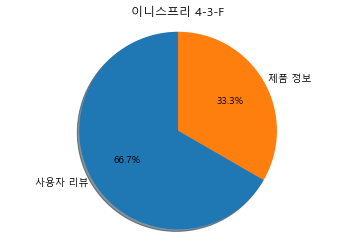

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 4-3-G
유저 수 : 8
답변 수(중복포함) : 8
Top 5


[('happy', 1),
 ('국민의 방송', 1),
 ('다양한 정보가 많아서요~~^^', 1),
 ('다양한 제품을 검색하고 가격과 사용후기를', 1),
 ('딸들이 인터넷 주문해서 사다주고 피부에도 맞습니다', 1)]

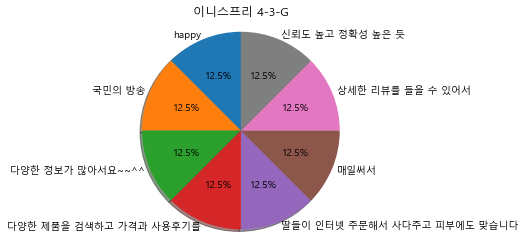

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-1-0
유저 수 : 299
답변 수(중복포함) : 299
Top 5


[('SNS', 88), ('포털사이트', 79), ('화장품 리뷰 앱', 47), ('쇼핑몰 후기', 30), ('비디오 플랫폼', 27)]

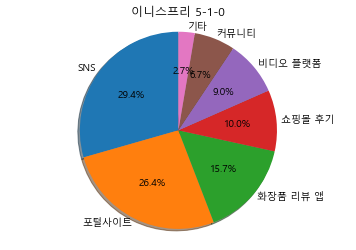

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-A
유저 수 : 79
답변 수(중복포함) : 79
Top 2


[('네이버', 76), ('기타', 3)]

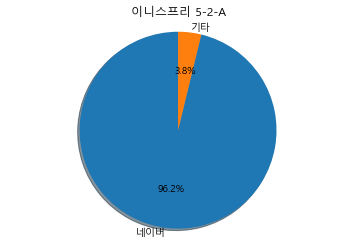

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-B
유저 수 : 27
답변 수(중복포함) : 27
Top 3


[('유튜브', 23), ('네이버 TV', 3), ('카카오 TV', 1)]

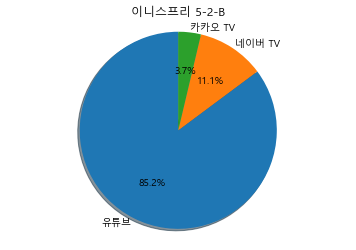

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-C
유저 수 : 88
답변 수(중복포함) : 88
Top 4


[('인스타그램', 48), ('블로그', 29), ('페이스북', 10), ('기타', 1)]

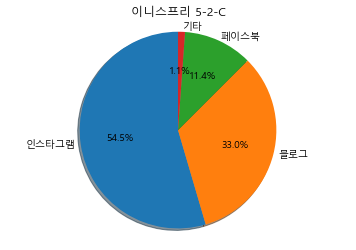

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-D
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('화해', 23), ('파우더룸', 9), ('글로우픽', 7), ('언니의파우치', 5), ('코스미', 2)]

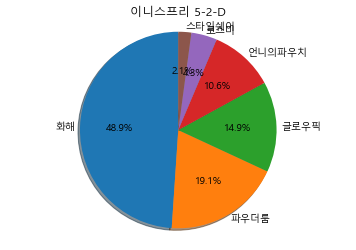

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-E
유저 수 : 20
답변 수(중복포함) : 20
Top 5


[('소울드레서', 3), ('파우더룸', 3), ('네이트 판', 2), ('블로그', 2), ('쌍화차코코아', 2)]

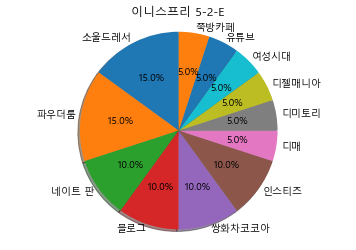

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-F
유저 수 : 30
답변 수(중복포함) : 30
Top 5


[('네이버 쇼핑', 9),
 ('브랜드 공식 홈페이지', 5),
 ('오픈마켓(G마켓', 5),
 ('종합 쇼핑몰(신세계몰', 4),
 ('11번가', 3)]

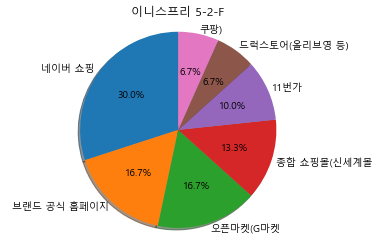

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-2-G
유저 수 : 8
답변 수(중복포함) : 8
Top 5


[('Sns', 1), ('kbs', 1), ('매장 방문', 1), ('멍멍', 1), ('면세점에서 삽니다', 1)]

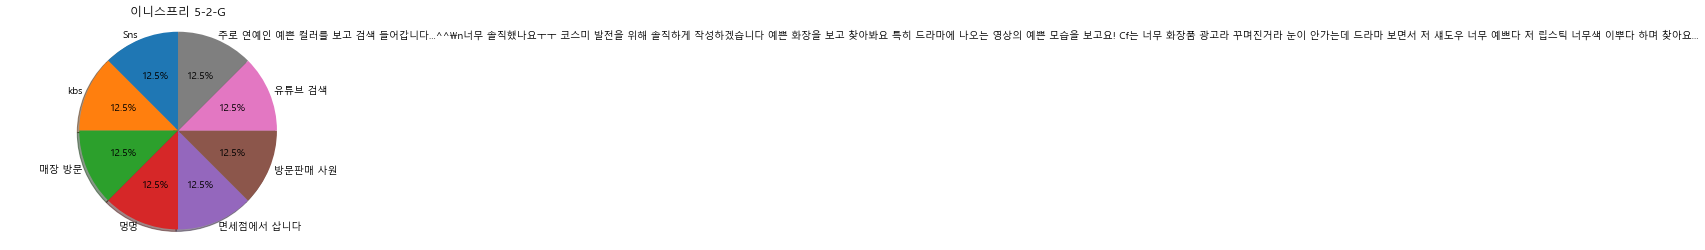

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-A
유저 수 : 79
답변 수(중복포함) : 79
Top 5


[('블로그/카페 후기', 57), ('공식 홈페이지', 13), ('이미지', 6), ('쇼핑몰', 2), ('기타', 1)]

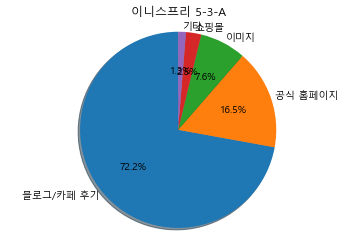

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-B
유저 수 : 27
답변 수(중복포함) : 27
Top 5


[('아는 유튜버의 콘텐츠', 10),
 ('상단에 뜨는 콘텐츠', 7),
 ('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 7),
 ('조회수가 많은 콘텐츠', 2),
 ('썸네일이 마음에 드는 콘텐츠', 1)]

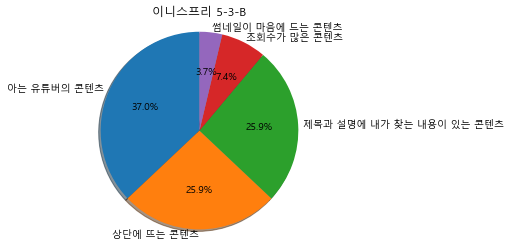

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-C
유저 수 : 88
답변 수(중복포함) : 88
Top 4


[('제목과 설명에 내가 찾는 내용이 있는 콘텐츠', 40),
 ('이미지가 마음에 드는 콘텐츠', 29),
 ('상단에 뜨는 콘텐츠', 10),
 ('영상 콘텐츠', 9)]

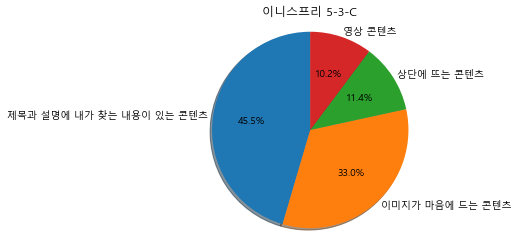

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-D
유저 수 : 47
답변 수(중복포함) : 47
Top 5


[('사용자 리뷰', 29), ('랭킹', 7), ('성분', 5), ('평점', 5), ('제품 정보', 1)]

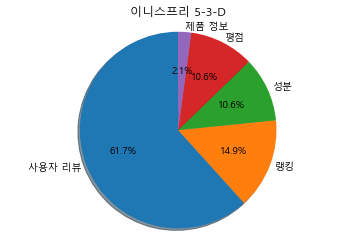

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-E
유저 수 : 20
답변 수(중복포함) : 20
Top 2


[('사용자 리뷰', 18), ('제품 정보', 2)]

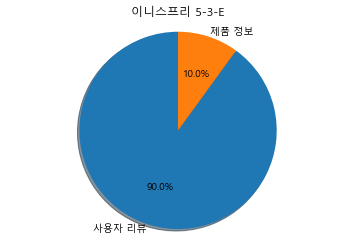

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-F
유저 수 : 30
답변 수(중복포함) : 30
Top 2


[('사용자 리뷰', 22), ('제품 정보', 8)]

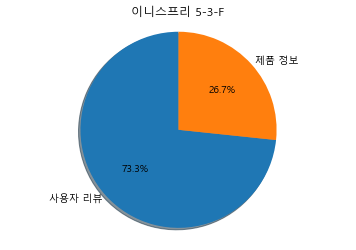

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 5-3-G
유저 수 : 8
답변 수(중복포함) : 8
Top 5


[('Heathy', 1),
 ('국민바앙송~.~', 1),
 ('다양한 리뷰들과 정보들이 많고\\n영어로 검색하면 외국 리뷰어 들의 영상도 있어\\n많은 정보 습득 가능', 1),
 ('선택의 폭이 워낙 넓어서', 1),
 ('오셔서 사달라며 이것저것 얹어주면 안 살 수가 없어요', 1)]

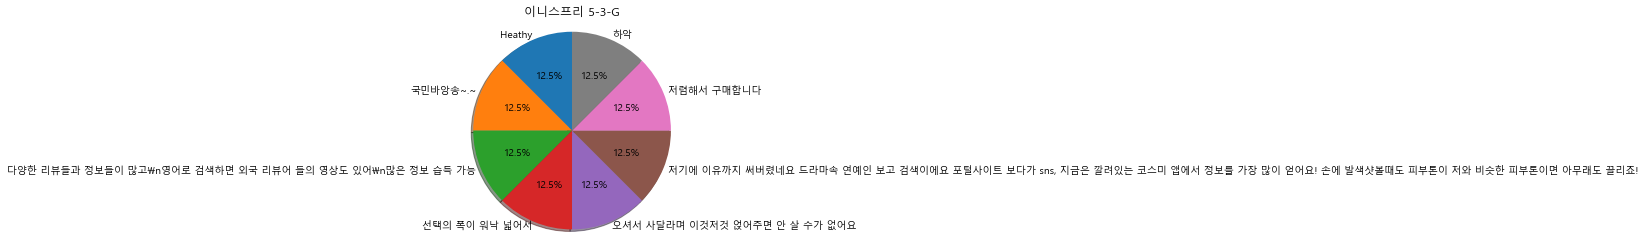

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-1-0
유저 수 : 269
답변 수(중복포함) : 723
Top 5


[('효과', 195), ('가격', 171), ('성분', 142), ('제품 후기', 120), ('브랜드', 53)]

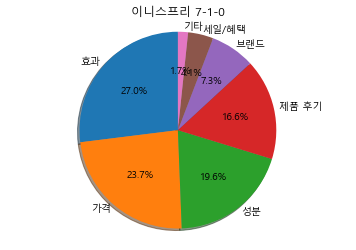

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-2-0
유저 수 : 269
답변 수(중복포함) : 705
Top 2


[('기타', 686), ('"', 19)]

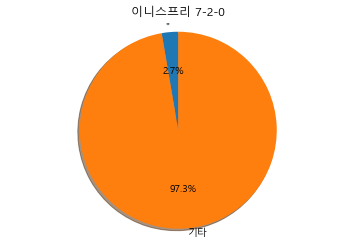

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 7-3-0
유저 수 : 269
답변 수(중복포함) : 269
Top 5


[('10,000~30,000원', 137),
 ('30,000~50,000원', 70),
 ('50,000~80,000원', 29),
 ('80,000원 이상', 19),
 ('10,000원 이하', 14)]

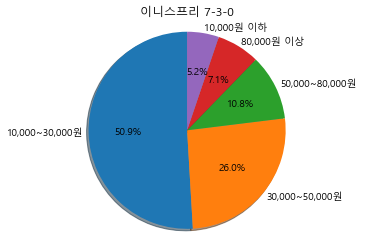

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-1-0
유저 수 : 261
답변 수(중복포함) : 695
Top 5


[('발색', 172), ('가격', 161), ('지속력', 159), ('제품 후기', 87), ('브랜드', 85)]

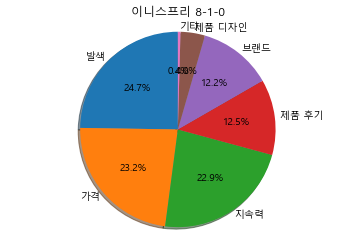

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-2-0
유저 수 : 261
답변 수(중복포함) : 651
Top 4


[('기타', 580), ('없음', 39), ('맥', 18), ('"', 14)]

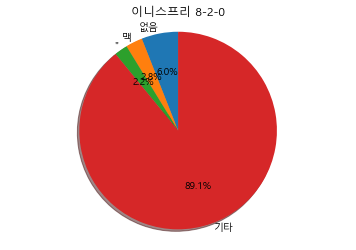

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
ASK : 8-3-0
유저 수 : 261
답변 수(중복포함) : 261
Top 5


[('10,000~30,000원', 104),
 ('10,000원 이하', 66),
 ('30,000~50,000원', 62),
 ('50,000~80,000원', 22),
 ('80,000원 이상', 7)]

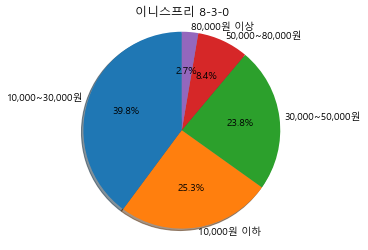

In [42]:
result_brand(innisfree, '이니스프리')

- 이니스프리 태그 포스팅 유저